In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split

#from lightgbm import LGBMClassifier
from sklearn.metrics import mean_absolute_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

C:\Users\Lenovo\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Lenovo\Anaconda3\lib\site-packages\distributed\utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  % (host, default, e), RuntimeWarning)


In [2]:
Train= pd.read_csv("D:\competition\Green_crop_yield\Train.csv")
Test = pd.read_csv("D:\competition\Green_crop_yield\Test.csv")
sample_submission= pd.read_csv("D:\competition\Green_crop_yield\SampleSubmission.csv")
VariableDescription= pd.read_csv("D:\competition\Green_crop_yield\VariableDescription.csv")                    

In [ ]:
Train.head()

In [ ]:
Train.info()

In [ ]:
Test.info()

In [ ]:
Train.describe()

In [ ]:
#VariableDescription

### Missing Values

In [ ]:
#missing data percentage (Train Data)
total = Train.isnull().sum().sort_values(ascending=False)
percent_1 = Train.isnull().sum()/Train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

In [ ]:
#missing data percentage (Train Data)
total = Test.isnull().sum().sort_values(ascending=False)
percent_1 = Test.isnull().sum()/Test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

In [22]:
Train.drop(['Ganaura' ,'CropOrgFYM', '2tdUrea','2appDaysUrea', 'BasalUrea',"OrgFertilizers"],axis=1 , inplace = True)
Test.drop(['Ganaura' ,'CropOrgFYM', '2tdUrea','2appDaysUrea', 'BasalUrea',"OrgFertilizers"],axis=1 , inplace = True)


In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['Yield'] >= 10000# in the test max=200
is_outlier 
for x in range(0,Train['Yield'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)

Train['Yield'].plot()

In [ ]:
# Train.drop('Threshing_date',axis=1 , inplace = True)



In [ ]:
Train.describe()

In [ ]:
Test.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257BFFB1B00>,
      dtype=object)

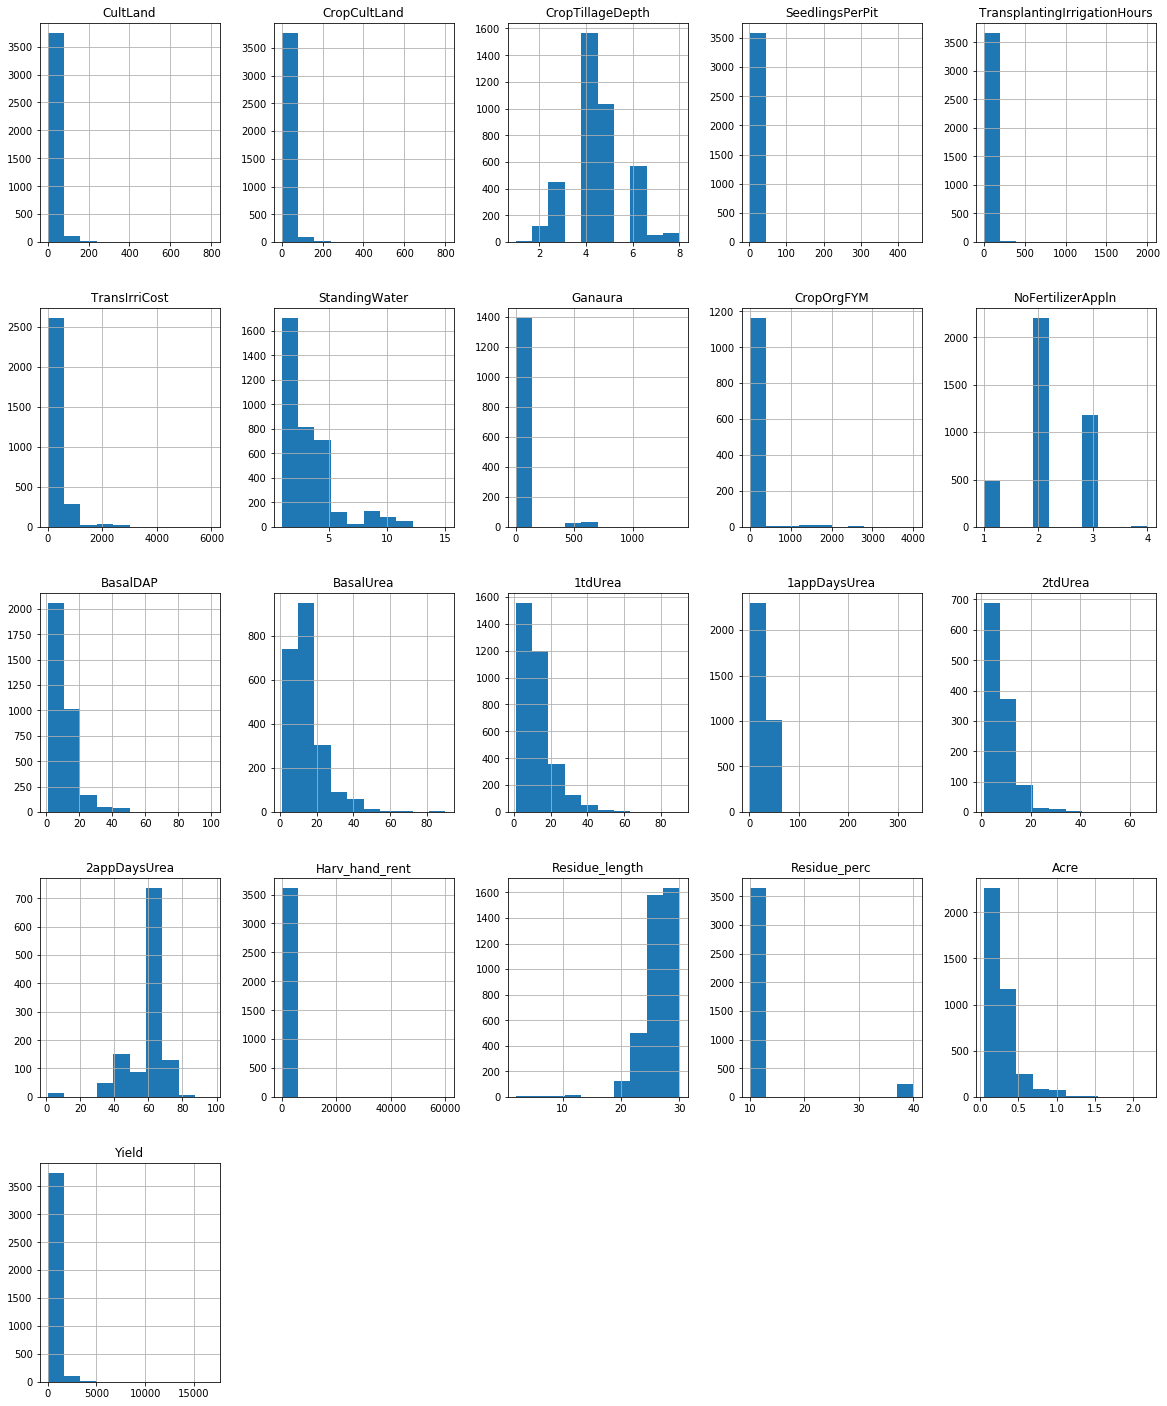

In [3]:
Train.hist(figsize=(20, 25))

In [ ]:
# Train.select_dtypes(include=np.int64).hist(figsize=(20,25))

#### we noticed that:
1-Residue_Perc has outliers that appear from its district distrubtion

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257C04C2898>,
      dtype=object)

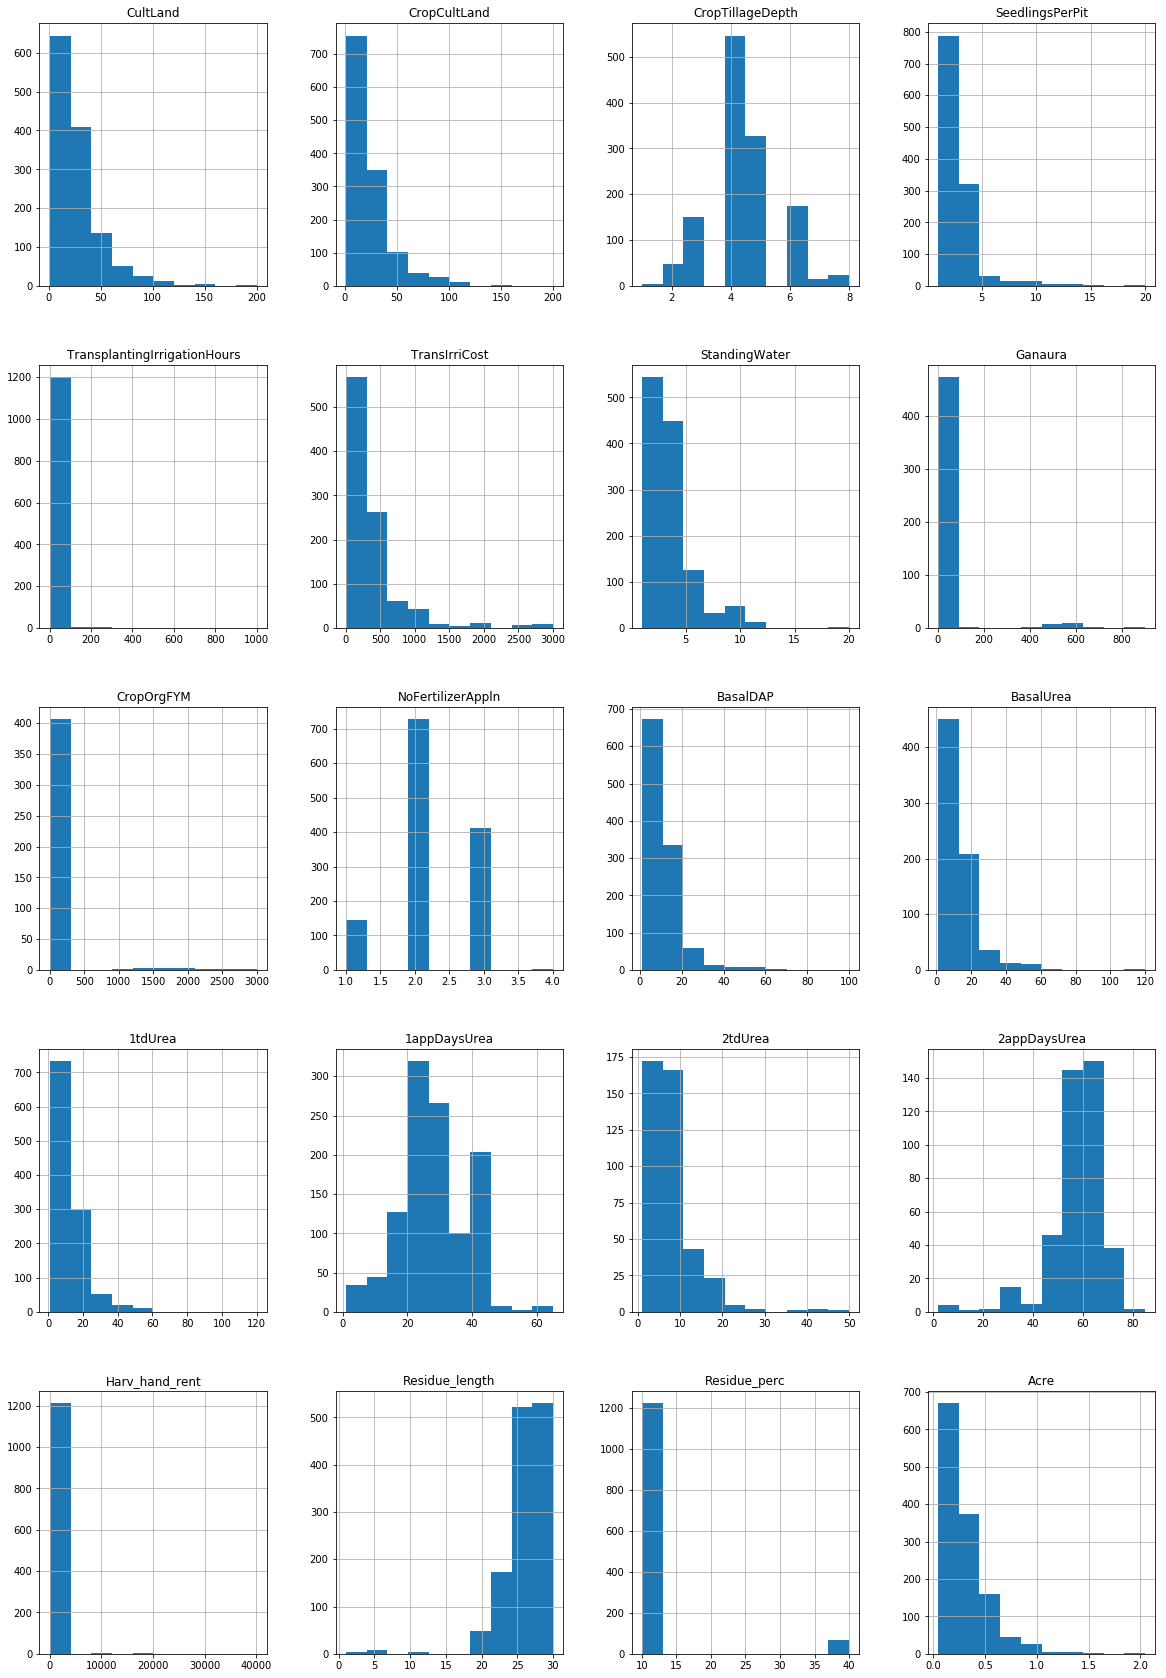

In [4]:
Test.hist(figsize=(20,30))

In [ ]:
df_object=Train.select_dtypes(include=np.object)
print(df_object.columns)


In [ ]:
# #Target Histogram
# sns.set()
# sns.histplot(train['target'])
Train['Yield'].plot()

In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['Yield'] >= 10000 # in the test max=40080 
Train[is_outlier] 
# for x in range(0,Train['1appDaysUrea'].size):
#     if (is_outlier[x] == True ):
#         Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']



In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['Yield'] >= 10000 # in the test max=40080 
# Train[is_outlier] 
for x in range(0,Train['Yield'].size):
    if (is_outlier[x] == True ):
        Train[is_outlier_yeild]=True
    else :
        Train[is_outlier_yeild]=False
# Train['1appDaysUrea']



In [ ]:
Train['Harv_hand_rent'].plot()

In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['Harv_hand_rent'] >= 50000 # in the test max=40080 
Train[is_outlier] 
# for x in range(0,Train['1appDaysUrea'].size):
#     if (is_outlier[x] == True ):
#         Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']


In [ ]:
Train['CultLand'].plot()

In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['CultLand'] >= 700 # in the test max=40080 
Train[is_outlier] 
# for x in range(0,Train['1appDaysUrea'].size):
#     if (is_outlier[x] == True ):
#         Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']



In [ ]:
Train['TransplantingIrrigationHours'].plot()

In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['TransplantingIrrigationHours'] >= 1750 # in the test max=40080 
Train[is_outlier] 
# for x in range(0,Train['1appDaysUrea'].size):
#     if (is_outlier[x] == True ):
#         Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']

In [ ]:
Train['TransIrriCost'].plot()

In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['TransIrriCost'] >= 5000 # in the test max=40080 
Train[is_outlier] 
# for x in range(0,Train['1appDaysUrea'].size):
#     if (is_outlier[x] == True ):
#         Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']

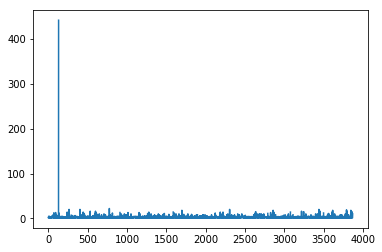

In [5]:
Train['SeedlingsPerPit'].plot()

In [6]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['SeedlingsPerPit'] >= 400 # in the test max=40080 
Train[is_outlier] 
for x in range(0,Train['SeedlingsPerPit'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']

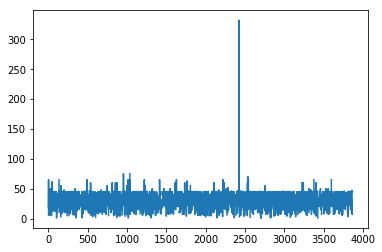

In [7]:
Train['1appDaysUrea'].plot()

In [10]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['1appDaysUrea'] >= 300 # in the test max=40080 
Train[is_outlier] 
#for x in range(0,Train['1appDaysUrea'].size):
#    if (is_outlier[x] == True ):
#        Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
2424,ID_KSDLAIMK2GNA,Gaya,Wazirganj,15,13,WetTillagePuddling FourWheelTracRotavator Trac...,2022-07-07,4,Manual_PuddledRandom,2022-06-23,2022-07-19,2.000,PreMonsoonShowers,SeedlingAge,4.000,Boring,Electric,105.000,6.000,Ganaura,3.000,nan,SoilApplied,2,DAP Urea,2.000,2.000,Broadcasting,Urea,3.000,332.000,nan,nan,Broadcasting,hand,2022-10-31,300.000,2022-11-02,machine,20,10,plowed_in_soil,0.111,210


In [ ]:
#The cardinality of each catgorical feature (Training)
cat_cols = Train.columns
for col in cat_cols:
    print(col, Train[col].nunique())

In [ ]:
feats=Train.columns
for feat in feats:
    train_unique=Train[feat].unique()
    print(feat,train_unique)

In [ ]:
XGB_feat_import=['SeedlingsPerPit' 'Acre' 'CropTillageDate_Month'
 'Threshing_date_DayOfYear' 'TransplantingIrrigationHours' '1appDaysUrea'
 '1tdUrea' 'Threshing_date_DayOfWeek' 'RcNursEstDate' 'TransIrriCost'
 'SeedingSowingTransplanting' 'CropTillageDate_DayOfYear'
 'CropTillageDepth' 'CropTillageDate_DayOfWeek' 'Harv_hand_rent'
 'CultLand' 'StandingWater' 'Threshing_date_Day' 'CropbasalFerts'
 'FirstTopDressFert']

In [ ]:
ob_feats=[ 'District', 'Block', 'LandPreparationMethod', 'CropTillageDate',
       'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting',
       'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'PCropSolidOrgFertAppMethod',
       'CropbasalFerts', 'MineralFertAppMethod', 'FirstTopDressFert',
       'MineralFertAppMethod.1', 'Harv_method', 'Harv_date', 'Threshing_date',
       'Threshing_method', 'Stubble_use']

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='District', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='Block', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='LandPreparationMethod', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='CropEstMethod', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x= 'SeedingSowingTransplanting', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='NursDetFactor', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='TransDetFactor', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x= 'TransplantingIrrigationSource', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='TransplantingIrrigationPowerSource', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='PCropSolidOrgFertAppMethod', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='CropbasalFerts', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='MineralFertAppMethod', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='FirstTopDressFert', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='MineralFertAppMethod.1', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x='Threshing_method', data= Train, palette="Set1");

In [ ]:
#Target Histogram
sns.set_style("white") 
sns.countplot( x= 'Stubble_use', data= Train, palette="Set1");

In [ ]:
Train.select_dtypes(include=np.number).plot()

## from histogram we noticed that:
1- CropCultLand and CultLand range about (0,800) in train and abot (0,200) in the test,we should ignore ouliers from train. 
2- TransplantingIrrigationHours range about (0,2000) in train and abot (0,1000) in the test,we should ignore ouliers from train.
3- 1tdUrea range about (0,90) in train and abot (0,120) in the test,we should ignore ouliers from test.
4- 1appDaysUrea	range about (1,332) in train and abot (1,65) in the test,we should ignore ouliers from train.
5-Harv_hand_rent	range about (1,60000) in train and abot (3,40080) in the test,we should ignore ouliers from train.
6-TransIrriCost range about (3,6000) in train and abot (1,3000) in the test,we should ignore ouliers from train.
7-SeedlingsPerPit range about (1,442) in train and abot (1,20) in the test,we should ignore ouliers from train.
8- 1tdUrea range about (0,15) in train and abot (0,20) in the test,we should ignore ouliers from test.



In [ ]:
# #The cardinality of each catgorical feature (Testing)
# cat_cols = test_df.columns
# for col in cat_cols:
#     print(col, test_df[col].nunique())

In [ ]:
width = 6
height = 5
d = Train.select_dtypes(include=np.number).dropna()
plt.figure(figsize=(width*3,height*2))

for i, column in enumerate(d.columns, 1):
    plt.subplot(2,3,i)
    plt.plot(d[column])
    plt.xlabel(column, fontsize=18)

In [ ]:
width = 6
height = 5
d = Train.select_dtypes(include=np.number)#Train.dropna()
plt.figure(figsize=(width*3,height*2))

for i, column in enumerate(d.columns, 1):
    plt.subplot(2,3,i)
    plt.boxplot(d[column])
    plt.xlabel(column, fontsize=18)

In [ ]:
Train_df.columns

In [ ]:
Train_df['Block'].hist()

In [ ]:
Train_df['Block'].hist(figsize = (20, 25))

In [ ]:
BSinfo["BS_CEELL"]

In [ ]:
BSinfo["BS"].nunique()

In [ ]:
test["BS"].nunique()

In [ ]:
CLdata["BS"].nunique()

In [ ]:
BSinfo.nunique()

In [ ]:
test.nunique()

In [ ]:
df_number=Train.select_dtypes(include=np.number)
print(df_number.columns)

In [ ]:

# # feats=df_1.columns
# feats =['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
#        'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
#        'NoFertilizerAppln', 'BasalDAP', '1tdUrea', '1appDaysUrea',
#        'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre']
# # feats =[ 'Hour', 'Mean_loadPerBS', 'sd_loadPerBS',
# #        'Mean_ESMode6PerBS', 'sd_ESMode6PerBS', 'Mean_ESMode2PerBS',
# #        'sd_ESMode2PerBS']
# df = pd.concat([Train,Test])

# for d in feats:
#     median = Train[d].median()# because mean affected by outliers
#     for dataset in [Train,Test]:
#         dataset[d] = dataset[d].fillna(median)


In [11]:
Train = Train.sort_values('CropTillageDate').reset_index(drop=True)
Test = Test.sort_values('CropTillageDate').reset_index(drop=True)

for dataset in (Train,Test):
    dataset['CropTillageDate'] = pd.to_datetime(dataset['CropTillageDate'])
    dataset['CropTillageDate_Day'] = dataset.CropTillageDate.dt.day
    dataset['CropTillageDate_Month'] = dataset.CropTillageDate.dt.month
#     dataset['Year'] = dataset.CropTillageDate.dt.year
#     dataset['Hour'] = dataset.CropTillageDate.dt.hour
#     dataset['Minute'] = dataset.CropTillageDate.dt.minute
#     dataset['Seconds'] = dataset.CropTillageDate.dt.second
    dataset['CropTillageDate_DayOfWeek'] = dataset.CropTillageDate.dt.dayofweek
    dataset['CropTillageDate_DayOfYear'] = dataset.CropTillageDate.dt.dayofyear
    dataset['CropTillageDate_Week'] = dataset.CropTillageDate.dt.weekofyear
    dataset.set_index("CropTillageDate", inplace=True)
   


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [12]:
Train = Train.sort_values('Threshing_date').reset_index(drop=True)
Test = Test.sort_values('Threshing_date').reset_index(drop=True)

for dataset in (Train,Test):
    dataset['Threshing_date'] = pd.to_datetime(dataset['Threshing_date'])
    dataset['Threshing_Day'] = dataset.Threshing_date.dt.day
    dataset['Threshing_Month'] = dataset.Threshing_date.dt.month
#     dataset['Year'] = dataset.Threshing_date.year
#     dataset['Hour'] = dataset.Threshing_date.dt.hour
#     dataset['Minute'] = dataset.Threshing_date.dt.minute
#     dataset['Seconds'] = dataset.Threshing_date.dt.second
    dataset['Threshing_DayOfWeek'] = dataset.Threshing_date.dt.dayofweek
    dataset['Threshing_DayOfYear'] = dataset.Threshing_date.dt.dayofyear
    dataset['Threshing_Week'] = dataset.Threshing_date.dt.weekofyear
    dataset.set_index("Threshing_date", inplace=True)
    


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [13]:
Train = Train.sort_values('RcNursEstDate').reset_index(drop=True)
Test = Test.sort_values('RcNursEstDate').reset_index(drop=True)

for dataset in (Train,Test):
    dataset['RcNursEstDate'] = pd.to_datetime(dataset['RcNursEstDate'])
    dataset['RcNursEstDate_Day'] = dataset.RcNursEstDate.dt.day
    dataset['RcNursEstDate_Month'] = dataset.RcNursEstDate.dt.month
#     dataset['Year'] = dataset.'RcNursEstDate'.year
#     dataset['Hour'] = dataset.Threshing_date.dt.hour
#     dataset['Minute'] = dataset.Threshing_date.dt.minute
#     dataset['Seconds'] = dataset.Threshing_date.dt.second
    dataset['RcNursEst_DayOfWeek'] = dataset.RcNursEstDate.dt.dayofweek
    dataset['RcNursEst_DayOfYear'] = dataset.RcNursEstDate.dt.dayofyear
    dataset['RcNursEst_Week'] = dataset.RcNursEstDate.dt.weekofyear
    dataset.set_index('RcNursEstDate', inplace=True)
    


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [14]:
Train = Train.sort_values( 'Harv_date').reset_index(drop=True)
Test = Test.sort_values( 'Harv_date').reset_index(drop=True)

for dataset in (Train,Test):
    dataset[ 'Harv_date'] = pd.to_datetime(dataset[ 'Harv_date'])
    dataset['Harv_Day'] = dataset.Harv_date.dt.day
    dataset['Harv_Month'] = dataset.Harv_date.dt.month
#     dataset['Year'] = dataset.'RcNursEstDate'.year
#     dataset['Hour'] = dataset.Threshing_date.dt.hour
#     dataset['Minute'] = dataset.Threshing_date.dt.minute
#     dataset['Seconds'] = dataset.Threshing_date.dt.second
    dataset['Harv_DayOfWeek'] = dataset.Harv_date.dt.dayofweek
    dataset['Harv_DayOfYear'] = dataset.Harv_date.dt.dayofyear
#     dataset['Harv_Week'] = dataset.Harv_date.weekofyear
    dataset.set_index('Harv_date', inplace=True)
    


In [ ]:
Train.tail()

In [ ]:
#The cardinality of each catgorical feature (Training)
cat_cols = Train.columns
for col in cat_cols:
    print(col, Train[col].nunique())

In [ ]:
test["Date_BS"].nunique()

In [ ]:
test.info()

In [ ]:
# #Aggregations
# #1_Mean_loadPerBS
# df_1['Mean_loadPerBS'] = df_1['BS'].map(dict(df_1.groupby('BS')['Acre'].mean()))
# #1_sd_loadPerBS 
# df_1['sd_loadPerBS'] = df_1['BS'].map(dict(df_1.groupby('BS')['load'].std()))
# #1_Mean_Emode6 PerBS
# df_1['Mean_ESMode6PerBS'] = df_1['BS'].map(dict(df_1.groupby('BS')['ESMode6'].mean()))
# #1_sd_loadPerBS 
# df_1['sd_ESMode6PerBS'] = df_1['BS'].map(dict(df_1.groupby('BS')['ESMode6'].std()))
# #1_Mean_Emode6 PerBS
# df_1['Mean_ESMode2PerBS'] = df_1['BS'].map(dict(df_1.groupby('BS')['ESMode2'].mean()))
# #1_sd_loadPerBS 
# df_1['sd_ESMode2PerBS'] = df_1['BS'].map(dict(df_1.groupby('BS')['ESMode2'].std()))
# ################################
# df_2['Mean_loadPerBS'] = df_2['BS'].map(dict(df_2.groupby('BS')['load'].mean()))
# #1_sd_loadPerBS 
# df_2['sd_loadPerBS'] = df_2['BS'].map(dict(df_2.groupby('BS')['load'].std()))
# #1_Mean_Emode6 PerBS
# df_2['Mean_ESMode6PerBS'] = df_2['BS'].map(dict(df_2.groupby('BS')['ESMode6'].mean()))
# #1_sd_loadPerBS 
# df_2['sd_ESMode6PerBS'] = df_2['BS'].map(dict(df_2.groupby('BS')['ESMode6'].std()))
# #1_Mean_Emode6 PerBS
# df_2['Mean_ESMode2PerBS'] = df_2['BS'].map(dict(df_2.groupby('BS')['ESMode2'].mean()))
# #1_sd_loadPerBS 
# df_2['sd_ESMode2PerBS'] = df_2['BS'].map(dict(df_2.groupby('BS')['ESMode2'].std()))

In [ ]:
Nan+.001

In [ ]:
# feat_1="BS"
# for dataset in df_1:
# #     dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(df_1.groupby(feat_1)[Feature].mean()))
#     #dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].median()))
#     dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(df_1.groupby(feat_1)['load'].std()))
#     dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(df_1.groupby(feat_1)['load'].min()))
#     dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(df_1.groupby(feat_1)['load'].max()))
#     dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(df_1.groupby(feat_1)['load'].sum()))
#     dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
#     #dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].var()))
    

# #     for dataset in df_2:
# #         dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_2].map(dict(df_2.groupby(feat_1)[Feature].mean()))
# #         #dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(df_2.groupby(feat_1)[Feature].median()))
# #         dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(df_2.groupby(feat_1)[Feature].std()))
# #         dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(df_2.groupby(feat_1)[Feature].min()))
# #         dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(df_2.groupby(feat_1)[Feature].max()))
# #         dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(df_2.groupby(feat_1)[Feature].sum()))
# #         dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
# #          #dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(train_df.groupby(feat_1)[Feature].var()))
        
            
         

#          #gg('load')
# # Agg('ESMode2')
# # Agg('ESMode6')

In [ ]:
# def Agg(Feature):
#     for dataset in (Train,Test):
#         for feat_1 in ['Block']:
#             dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].mean()))
#             dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].median()))
# #             dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].std()))
#             dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].min()))
#             dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].max()))
#             dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].sum()))
#             dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
# #             dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].var()))
#             dataset[f'{Feature}_Agg_{feat_1}_last'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].last()))
#             dataset[f'{Feature}_Agg_{feat_1}_first'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].first()))
# Agg('Acre')

In [ ]:
def Agg(Feature):
    for dataset in (Train,Test):
        for feat_1 in ['PCropSolidOrgFertAppMethod']:
            dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].mean()))
            dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].median()))
#             dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].std()))
            dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].min()))
            dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].max()))
            dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].sum()))
            dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
#             dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].var()))
            dataset[f'{Feature}_Agg_{feat_1}_last'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].last()))
            dataset[f'{Feature}_Agg_{feat_1}_first'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].first()))
Agg('Acre')

In [ ]:
# def Agg(Feature):
#     for dataset in (Train,Test):
#         for feat_1 in ['Block']:
#             dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].mean()))
#             dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].median()))
# #             dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].std()))
#             dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].min()))
#             dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].max()))
#             dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].sum()))
#             dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
# #             dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].var()))
#             dataset[f'{Feature}_Agg_{feat_1}_last'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].last()))
#             dataset[f'{Feature}_Agg_{feat_1}_first'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].first()))
# Agg('SeedlingsPerPit')

In [ ]:
def Agg(Feature):
    for dataset in (Train,Test):
        for feat_1 in ['PCropSolidOrgFertAppMethod']:
            dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].mean()))
            dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].median()))
#             dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].std()))
            dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].min()))
            dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].max()))
            dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].sum()))
            dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
#             dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].var()))
            dataset[f'{Feature}_Agg_{feat_1}_last'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].last()))
            dataset[f'{Feature}_Agg_{feat_1}_first'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].first()))
Agg('SeedlingsPerPit')

In [ ]:
def Agg(Feature):
    for dataset in (Train,Test):
        for feat_1 in ['PCropSolidOrgFertAppMethod']:
            dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].mean()))
            dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].median()))
#             dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].std()))
            dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].min()))
            dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].max()))
            dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].sum()))
            dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
#             dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].var()))
            dataset[f'{Feature}_Agg_{feat_1}_last'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].last()))
            dataset[f'{Feature}_Agg_{feat_1}_first'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].first()))
Agg('TransIrriCost')

In [ ]:
# def Agg(Feature):
#     for dataset in (Train,Test):
#         for feat_1 in ['PCropSolidOrgFertAppMethod']:
#             dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].mean()))
#             dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].median()))
# #             dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].std()))
#             dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].min()))
#             dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].max()))
#             dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].sum()))
#             dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
# #             dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].var()))
#             dataset[f'{Feature}_Agg_{feat_1}_last'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].last()))
#             dataset[f'{Feature}_Agg_{feat_1}_first'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].first()))
# Agg('SeedlingsPerPit')

In [ ]:
def Agg(Feature):
    for dataset in (Train,Test):
        for feat_1 in ['PCropSolidOrgFertAppMethod']:
            dataset[f'{Feature}_Agg_{feat_1}_mean'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].mean()))
            dataset[f'{Feature}_Agg_{feat_1}_median'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].median()))
#             dataset[f'{Feature}_Agg_{feat_1}_std'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].std()))
            dataset[f'{Feature}_Agg_{feat_1}_min'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].min()))
            dataset[f'{Feature}_Agg_{feat_1}_max'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].max()))
            dataset[f'{Feature}_Agg_{feat_1}_sum'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].sum()))
            dataset[f'{Feature}_Agg_{feat_1}_range'] = dataset[f'{Feature}_Agg_{feat_1}_max'] - dataset[f'{Feature}_Agg_{feat_1}_min']
#             dataset[f'{Feature}_Agg_{feat_1}_var'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].var()))
            dataset[f'{Feature}_Agg_{feat_1}_last'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].last()))
            dataset[f'{Feature}_Agg_{feat_1}_first'] = dataset[feat_1].map(dict(dataset.groupby(feat_1)[Feature].first()))
Agg('1appDaysUrea')

In [ ]:
sns.countplot( x='Hour', data=df_1, hue="w", palette="Set1");

In [ ]:
sns.countplot( x='CellName', data=df_1, hue="w", palette="Set1");

In [ ]:
Train.info()

In [ ]:
sns.countplot( x='BS_x', data=df_1, hue="w", palette="Set1");

## it nessaserialy to do not drop Date_ BS at this time

In [ ]:
df_1.info()


In [ ]:
# df_1.rename(columns={'Hour_y' :'Hour' }, inplace=True)
# df_2.rename(columns={'Hour_y' :'Hour'  }, inplace=True)

In [ ]:
df_1.info()

In [ ]:
df_1.drop_duplicates(inplace=True)

In [ ]:
df_1.info()

In [ ]:
# def rolling(feature):
#     for dataset in (df_1,df_2):
#         dataset['Mean_loadPerBS_Rolling_3'] = dataset[feature].rolling(3).mean()
#         dataset['sd_loadPerBS_Rolling_5'] = dataset[feature].rolling(5).mean()

#         dataset[f"{feature}_rolling_mean_60"] = dataset[feature].rolling(60).mean()
#         dataset[f"{feature}_rolling_sd_60"] = dataset[feature].rolling(60).std()
#         dataset[f"{feature}_rolling_sum_60"] = dataset[feature].rolling(60).sum()

#         dataset[f"{feature}_rolling_mean_30"] = dataset[feature].rolling(30).mean()
#         dataset[f"{feature}_rolling_sd_30"] = dataset[feature].rolling(30).std()
#         dataset[f"{feature}_rolling_sum_30"] = dataset[feature].rolling(30).sum()

#         dataset[f"{feature}_rolling_mean_10"] = dataset[feature].rolling(10).mean()
#         dataset[f"{feature}_rolling_max_10"] = dataset[feature].rolling(10).std()
#         dataset[f"{feature}_rolling_sum_10"] = dataset[feature].rolling(10).sum()

# rolling('Mean_loadPerBS')
# rolling('sd_loadPerBS')

In [ ]:
def MeanSd(feature1, feature2):
    for dataset in (Train,Test):
        dataset["SD-AcreUrea"] = dataset[[feature1,feature2]].std(axis=1)
        dataset["MEAN_AcreUrea"] = dataset[[feature1,feature2]].mean(axis=1)

MeanSd('Acre', '1appDaysUrea')

In [ ]:
def MeanSd(feature1, feature2):
    for dataset in (Train,Test):
        dataset["SD-AcreIrri"] = dataset[[feature1,feature2]].std(axis=1)
        dataset["MEAN_AcreIrri"] = dataset[[feature1,feature2]].mean(axis=1)

MeanSd('Acre', 'TransIrriCost')

Math

In [ ]:
#  def Math(feature1, feature2):
#     for dataset in (Train,Test):
#         dataset["AcreIrri_PLus"] = dataset[feature1]+dataset[feature2]
#         dataset["AcreIrri_Minus"] = dataset[feature1]-dataset[feature2]
#         dataset["AcreIrri_mult"] = dataset[feature1]*dataset[feature2]
#         dataset["AcreIrri_div"] = dataset[feature1]/dataset[feature2]+0.001

# Math('Acre','TransIrriCost')

In [ ]:
#  def Math(feature1, feature2):
#     for dataset in (Train,Test):
#         dataset["AcreBas_PLus"] = dataset[feature1]+dataset[feature2]
#         dataset["AcreBas_Minus"] = dataset[feature1]-dataset[feature2]
#         dataset["AcreBas_mult"] = dataset[feature1]*dataset[feature2]
#         dataset["AcreBas_div"] = dataset[feature1]/dataset[feature2]+0.001

# Math('Acre','BasalDAP')

In [ ]:
 def Math(feature1, feature2):
    for dataset in (Train,Test):
        dataset["AcreUrea_PLus"] = dataset[feature1]+dataset[feature2]
        dataset["AcreUrea_Minus"] = dataset[feature1]-dataset[feature2]
        dataset["AcreUrea_mult"] = dataset[feature1]*dataset[feature2]
        dataset["AcreUrea_div"] = dataset[feature1]/dataset[feature2]+0.001

Math('Acre', '1appDaysUrea')

In [ ]:
#  def Math(feature1, feature2):
#     for dataset in (Train,Test):
#         dataset["AcreSeed_PLus"] = dataset[feature1]+dataset[feature2]
#         dataset["AcreSeed_Minus"] = dataset[feature1]-dataset[feature2]
#         dataset["AcreSeed_mult"] = dataset[feature1]*dataset[feature2]
#         dataset["AcreSeed_div"] = dataset[feature1]/dataset[feature2]+0.001

# Math('Acre', 'SeedlingsPerPit')

In [ ]:
#  def Math(feature1, feature2):
#     for dataset in (Train,Test):
#         dataset["UreTrans_PLus"] = dataset[feature1]+dataset[feature2]
#         dataset["UreTrans_Minus"] = dataset[feature1]-dataset[feature2]
#         dataset["UreTrans_mult"] = dataset[feature1]*dataset[feature2]
#         dataset["UreTrans_div"] = dataset[feature1]/dataset[feature2]+0.001

# Math('1appDaysUrea', 'TransIrriCost')

In [ ]:
#  def Math(feature1, feature2):
#     for dataset in (Train,Test):
#         dataset["UreSeed_PLus"] = dataset[feature1]+dataset[feature2]
#         dataset["UreSeed_Minus"] = dataset[feature1]-dataset[feature2]
#         dataset["UreSeed_mult"] = dataset[feature1]*dataset[feature2]
#         dataset["UreSeed_div"] = dataset[feature1]/dataset[feature2]+0.001

# Math('1appDaysUrea', 'SeedlingsPerPit')

In [ ]:
#  def Math(feature1, feature2):
#     for dataset in (Train,Test):
#         dataset["Seederans_PLus"] = dataset[feature1]+dataset[feature2]
#         dataset["SeedTrans_Minus"] = dataset[feature1]-dataset[feature2]
#         dataset["SeedTrans_mult"] = dataset[feature1]*dataset[feature2]
#         dataset["SeedTrans_div"] = dataset[feature1]/dataset[feature2]+0.001

# Math('SeedlingsPerPit', 'TransIrriCost')

In [ ]:
# for dataset in (df_1,df_2):
#     dataset['DayOfWeek'] = dataset.Date.dt.dayofweek
#     dataset['Day'] = dataset.Date.dt.day
#     dataset['Week'] = dataset.Date.dt.day
#     dataset['Week_Day_Hour'] = dataset['DayOfWeek'].astype(str) + '-' + dataset['Hour'].astype(str)
#     dataset['Day_Hour']  =  dataset['Day'].astype(str) + '-' + dataset['Hour'].astype(str)
#     dataset['Week_Hour']  =  dataset['Week'].astype(str) + '-' + dataset['Hour'].astype(str)
#     dataset['BS_Hour']  =  dataset['BS'].astype(str) + '-' + dataset['Hour'].astype(str)
    

In [ ]:
Train.info()

In [ ]:
Test.info()

In [ ]:
df_1.describe()

In [ ]:
df_2.describe()

In [ ]:
df_1.hist()

In [ ]:
df_1.hist()

In [ ]:
# df_1["Mean_loadPerBS"] = np.log(df_1["Mean_loadPerBS"]+0.001)
# df_1["Mean_ESMode6PerBS"] = np.log(df_1["Mean_ESMode6PerBS"]+0.001)
# df_1["Mean_ESMode2PerBS"] = np.log(df_1["Mean_ESMode2PerBS"]+0.001)
# df_1["sd_loadPerBS"] = np.log(df_1["sd_loadPerBS"]+0.001)
# df_1["sd_ESMode6PerBS"] = np.log(df_1["sd_ESMode6PerBS"]+0.001)
# df_1["sd_ESMode2PerBS"] = np.log(df_1["sd_ESMode2PerBS"]+0.001)
# ###################
# df_2["Mean_loadPerBS"] = np.log(df_2["Mean_loadPerBS"]+0.001)
# df_2["Mean_ESMode6PerBS"] = np.log(df_2["Mean_ESMode6PerBS"]+0.001)
# df_2["Mean_ESMode2PerBS"] = np.log(df_2["Mean_ESMode2PerBS"]+0.001)
# df_2["sd_loadPerBS"] = np.log(df_2["sd_loadPerBS"]+0.001)
# df_2["sd_ESMode6PerBS"] = np.log(df_2["sd_ESMode6PerBS"]+0.001)
# df_2["sd_ESMode2PerBS"] = np.log(df_2["sd_ESMode2PerBS"]+0.001)

In [ ]:
df_1.hist(figsize = (20, 25))

In [ ]:
# attributes = ["Mean_ESMode6PerBS", "Mean_ESMode2PerBS"]
# sns.pairplot(df_2.reset_index(drop=True)[attributes], diag_kind="kde")
# plt.gcf().set_size_inches(15, 10)

LOFO

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

# import data
train_df = pd.read_csv("../input/train.csv", dtype=dtypes)

# extract a sample of the data
sample_df = train_df.sample(frac=0.01, random_state=0)
sample_df.sort_values("AvSigVersion", inplace=True) # Sort by time for time split validation

# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

# define the binary target and the features
dataset = Dataset(df=sample_df, target="HasDetections", features=[col for col in train_df.columns if col != "HasDetections"], auto_group_threshold=0.5)

# define the validation scheme and scorer
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importance of each feature
importance_df = lofo_imp.get_importance()

# plot the feature importances
plot_importance(importance_df, figsize=(12, 20))

In [ ]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    params = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
        "max_depth": trial.suggest_int("max_depth", 1, 9),
        "eta": trial.suggest_loguniform("eta", 1e-8, 1.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 300),
        "subsample": trial.suggest_discrete_uniform("subsample", 0.1, 1, 0.01),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.1, 1, 0.01),
        "colsample_bylevel": trial.suggest_discrete_uniform("colsample_bylevel", 0.1, 1, 0.01),
        "colsample_bynode": trial.suggest_discrete_uniform("colsample_bynode", 0.1, 1, 0.01),
        "tree_method": "gpu_hist",
        "predictor": "gpu_predictor",
        "seed": 42,
    }

    bst = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, "validation")], early_stopping_rounds=50, verbose_eval=False)

    y_pred = bst.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

In [ ]:
best_params = study.best_params
best_params["tree_method"] = "gpu_hist"
best_params["predictor"] = "gpu_predictor"

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

bst = xgb.train(best_params, dtrain, num_boost_round=1000, evals=[(dval, "validation")], early_stopping_rounds=50, verbose_eval=False)

# Outliers

## from histogram we noticed that:
1- CropCultLand and CultLand range about (0,800) in train and abot (0,200) in the test,we should ignore ouliers from train. 
2- TransplantingIrrigationHours range about (0,2000) in train and abot (0,1000) in the test,we should ignore ouliers from train.
3- 1tdUrea range about (0,90) in train and abot (0,120) in the test,we should ignore ouliers from test.
4- 1appDaysUrea	range about (1,332) in train and abot (1,65) in the test,we should ignore ouliers from train.
5-Harv_hand_rent	range about (1,60000) in train and abot (3,40080) in the test,we should ignore ouliers from train.
6-TransIrriCost range about (3,6000) in train and abot (1,3000) in the test,we should ignore ouliers from train.
7-SeedlingsPerPit range about (1,442) in train and abot (1,20) in the test,we should ignore ouliers from train.
8- range about (0,15) in train and abot (0,20) in the test,we should ignore ouliers from test.


In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['Yield'] >= 10000# in the test max=200
is_outlier 
for x in range(0,Train['Yield'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)

Train['Yield'].plot()

In [ ]:
# z_scores = stats.zscore(Train['Fare'])
# absolute_z_score = np.abs(z_scores)
# is_outlier = absolute_z_score >= 2
# is_outlier 
# for x in range(0,train_df['Fare'].size):
#     if (is_outlier[x] == True ):
#         train_df.drop(axis=1, index=x,inplace=True)


In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['CropCultLand'] >= 300# in the test max=200
is_outlier 
for x in range(0,Train['CropCultLand'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)
print(Train['CropCultLand'].hist())


In [ ]:
Train['CultLand'].hist()

In [ ]:
print(Train['CropCultLand'].hist())

In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['CultLand'] >= 250 # in the test max=200
# is_outlier 
for x in range(0,Train['CultLand'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)
Train['CultLand']


In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['SeedlingsPerPit'] >= 25# in the test max=20
# is_outlier 
for x in range(0,Train['SeedlingsPerPit'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)
Train['SeedlingsPerPit']


In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['TransIrriCost'] >= 3005 # in the test max=20
# is_outlier 
for x in range(0,Train['TransIrriCost'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)
Train['TransIrriCost']


In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['Harv_hand_rent'] >= 40090 # in the test max=40080 
# is_outlier 
for x in range(0,Train['Harv_hand_rent'].size):
    if (is_outlier[x] == True ):
        Train.drop(axis=1, index=x,inplace=True)
Train['Harv_hand_rent']


In [ ]:
#z_scores = stats.zscore(Train['Fare'])
#absolute_z_score = np.abs(z_scores)
is_outlier = Train['1appDaysUrea'] >= 300 # in the test max=40080 
Train[is_outlier] 
# for x in range(0,Train['1appDaysUrea'].size):
#     if (is_outlier[x] == True ):
#         Train.drop(axis=1, index=x,inplace=True)
# Train['1appDaysUrea']



In [ ]:
import pandas as pd

df1 = pd.DataFrame({'A':[1,2,3],'B':[4,5,6]})
print(df1)
   A  B
0  1  4
1  2  5
2  3  6

df2 = pd.DataFrame({'A':[1,10,3],'B':[4,5,6]})
print(df2)
   A  B
0  1  4
1 10  5
2  3  6

mask = df1['A'].isin(df2['A'].unique())
df3 = df1[mask]
print(df3)
   A  B
0  1  4
2  3  6

In [ ]:
Train.describe()

In [ ]:
Test.describe()

In [ ]:
width = 6
height = 5
d = Train.select_dtypes(include=np.number).dropna()
plt.figure(figsize=(width*3,height*2))

for i, column in enumerate(d.columns, 1):
    plt.subplot(2,3,i)
    plt.boxplot(d[column])
    plt.xlabel(column, fontsize=18)

In [ ]:
# df_1.drop_duplicates(inplace=True)

In [ ]:
df_2['Day']

In [ ]:
# df_1["BS_C_H"]=df_1["BS"].apply(str)+"_"+df_1['CellName'].apply(str)+"_"+df_1['Hour'].apply(str)
# df_2["BS_C_H"]=df_2["BS"].apply(str)+"_"+df_2['CellName'].apply(str)+"_"+df_2['Hour'].apply(str)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import rcParams

rcParams["figure.figsize"] = 10, 8
fig = plot_acf(Train['Acre'].ffill(), lags=60)

plt.title("Autocorrelation")
plt.ylabel("Correlation")
plt.xlabel("Lag at k")
plt.show();


In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf
# from matplotlib import rcParams

# rcParams["figure.figsize"] = 15, 12
# fig = plot_acf(df_2['load'].ffill(), lags=60)

# plt.title("Autocorrelation")
# plt.ylabel("Correlation")
# plt.xlabel("Lag at k")
# plt.show();


### The is a relation between lag 1 & 18

In [ ]:
# # for dataset in (df_2,test):
# #     dataset['load_LagN3'] =  dataset['load'].shift(18)
# df_1['load_LagN3'] =  df_1['load'].shift(18)
# df_2['load_LagN3'] =  df_2['load'].shift(18)

In [ ]:
# #ESMode6
# from statsmodels.graphics.tsaplots import plot_acf
# from matplotlib import rcParams

# rcParams["figure.figsize"] = 10, 8
# fig = plot_acf(df_2['ESMode6'].ffill(), lags=60)

# plt.title("Autocorrelation")
# plt.ylabel("Correlation")
# plt.xlabel("Lag at k")
# plt.show();


### The is a relation between lag 1 & 2

In [ ]:
# # for dataset in (df_2,test):
# #     dataset['ESMode6_LagN3'] =  dataset['ESMode6'].shift(-2)
# df_1['ESMode6_LagN2'] =  df_1['ESMode6'].shift(-2)
# df_2['ESMode6_LagN2'] =  df_2['ESMode6'].shift(-2)

In [ ]:
df_2.describe()

In [ ]:
# df_1['ESMode6_LagN2']=df_1['ESMode6_LagN2'].ffill()
# df_2['ESMode6_LagN2']=df_2['ESMode6_LagN2'].ffill()

In [ ]:
# df_1['load_LagN3']=df_1['load_LagN3'].bfill()
# df_2['load_LagN3']=df_2['load_LagN3'].bfill()

In [ ]:
df_2.describe()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import rcParams

rcParams["figure.figsize"] = 10, 8
fig = plot_acf(df_2['Mean_ESMode2PerBS'].ffill(), lags=30)

plt.title("Autocorrelation")
plt.ylabel("Correlation")
plt.xlabel("Lag at k")
plt.show();


In [ ]:
Train_df.columns

In [ ]:
Train_df.info()

### Reduce features

In [ ]:
feat_import=['Acre', '1appDaysUrea' ,'RcNursEstDate', 'CropTillageDate' ,'Harv_hand_rent',
 'Threshing_date', 'TransIrriCost' ,'Harv_date' ,'SeedingSowingTransplanting',
 'TransplantingIrrigationHours', 'BasalDAP' ,'TransDetFactor',
 'LandPreparationMethod', 'CropCultLand', 'CultLand', 'CropbasalFerts',
 'FirstTopDressFert' ,'NursDetFactor', '1tdUrea' ,'Residue_length']
# ['Acre' '1appDaysUrea' 'RcNursEstDate' 'CropTillageDate' 'Harv_hand_rent'
#  'Threshing_date' 'TransIrriCost' 'Harv_date' 'SeedingSowingTransplanting'
#  'TransplantingIrrigationHours' 'BasalDAP' 'TransDetFactor'
#  'LandPreparationMethod' 'CropCultLand' 'CultLand' 'CropbasalFerts'
#  'FirstTopDressFert' 'NursDetFactor' '1tdUrea' 'Residue_length']
plotImp(XGBRegressor,Train.drop(['ID', 'Yield'], axis=1))
reduced=Train[feat_import]
reduced.info() 


In [ ]:
reduced_num=reduced.select_dtypes(include=np.number)
print(reduced_num.columns)

In [ ]:
# # feats=df_1.columns
# feats =[]

# df = pd.concat([Train_df,Test])
# # median = df["Age"].median() 
# for d in feats:
#     median = Train_df[d].median()
#     for dataset in [Train_df,Test]:
#         dataset[d] = dataset[d].fillna(median)

    


In [ ]:
reduced_obj=reduced.select_dtypes(include=np.object)
print(reduced_obj.columns)

In [ ]:
# feats=[]

# df = pd.concat([Train,Test])
# # median = df["Age"].median() 
# for d in feats:
#     mode = df[d].mode()
#     for dataset in [Train,Test]:
#         dataset[d] = dataset[d].fillna(mode[0])

    


In [ ]:
# df_starter=Train.select_dtypes(include=np.number)
# print(df_starter.columns)

In [ ]:
# feat_starter=['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
#        'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
#        'NoFertilizerAppln', 'BasalDAP', '1tdUrea', '1appDaysUrea',
#        'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre', 'Yield']
# starter=Train[feat_starter]
# starter.info() 

In [ ]:
# # feats=df_1.columns
# feats =['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
#        'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
#        'NoFertilizerAppln', 'BasalDAP', '1tdUrea', '1appDaysUrea',
#        'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre']
# # feats =[ 'Hour', 'Mean_loadPerBS', 'sd_loadPerBS',
# #        'Mean_ESMode6PerBS', 'sd_ESMode6PerBS', 'Mean_ESMode2PerBS',
# #        'sd_ESMode2PerBS']
# df = pd.concat([Train,Test])
# # median = df["Age"].median() 
# for d in feats:
#     mean = Train[d].median()
#     for dataset in [Train,Test]:
#         dataset[d] = dataset[d].fillna(median)


In [ ]:
# # feats=df_1.columns
# feats =[']
# # feats =[ 'Hour', 'Mean_loadPerBS', 'sd_loadPerBS',
# #        'Mean_ESMode6PerBS', 'sd_ESMode6PerBS', 'Mean_ESMode2PerBS',
# #        'sd_ESMode2PerBS']
# df = pd.concat([Train,Test])

# for d in feats:
#     mean = Train[d].mean()# because mean affected by outliers
#     for dataset in [Train,Test]:
#         dataset[d] = dataset[d].fillna(mean)


### handeling missing values

In [ ]:
df_number=Train.select_dtypes(include=np.number)
print(df_number.columns)

In [15]:

# feats=df_1.columns
feats =['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'NoFertilizerAppln', 'BasalDAP', '1tdUrea', '1appDaysUrea',
       'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre', 
       'CropTillageDate_Day', 'CropTillageDate_Month',
       'CropTillageDate_DayOfWeek', 'CropTillageDate_DayOfYear',
       'CropTillageDate_Week', 'Threshing_Day', 'Threshing_Month',
       'Threshing_DayOfWeek', 'Threshing_DayOfYear', 'Threshing_Week',
       'RcNursEstDate_Day', 'RcNursEstDate_Month', 'RcNursEst_DayOfWeek',
       'RcNursEst_DayOfYear', 'RcNursEst_Week', 'Harv_Day', 'Harv_Month',
       'Harv_DayOfWeek', 'Harv_DayOfYear']
# feats =[ 'Hour', 'Mean_loadPerBS', 'sd_loadPerBS',
#        'Mean_ESMode6PerBS', 'sd_ESMode6PerBS', 'Mean_ESMode2PerBS',
#        'sd_ESMode2PerBS']
df = pd.concat([Train,Test])

for d in feats:
    median = Train[d].median()# because mean affected by outliers
    for dataset in [Train,Test]:
        dataset[d] = dataset[d].fillna(median)


In [21]:
df_object=Train.select_dtypes(include=np.object)
print(df_object.columns)


Index(['ID', 'OrgFertilizers'], dtype='object')


In [16]:

feats=['District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'SeedingSowingTransplanting', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Stubble_use']

df = pd.concat([Train,Test])
# median = df["Age"].median() 
for d in feats:
    mode = df[d].mode()
    for dataset in [Train,Test]:
        dataset[d] = dataset[d].fillna(mode[0])

    


In [ ]:
# # feats=df_1.columns
# feats =[]

# df = pd.concat([Train_df,Test])
# # median = df["Age"].median() 
# for d in feats:
#     mode = df[d].mode()
#     for dataset in [Train_df,Test]:
#         dataset[d] = dataset[d].fillna(mode[0])

    


In [ ]:
Train.info()

In [ ]:
Test.info()

In [ ]:
# attributes = ["Mean_loadPerBS", "Mean_ESMode6PerBS"]
# sns.pairplot(df_2.reset_index(drop=True)[attributes], diag_kind="kde")
# plt.gcf().set_size_inches(15, 10)

In [ ]:
# df_1["Date_BS"]=df_1['Date_y'].apply(str)+"_"+df_1['BS'].apply(str)

In [ ]:
# ID=df_1["Date_BS"]'LandPreparationMethod','NursDetFactor', 'TransDetFactor', 

### Encoding

In [ ]:
df_object=Train.select_dtypes(include=np.object)
print(df_object.columns)


In [17]:
feats = ['District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'SeedingSowingTransplanting', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Stubble_use']
le = LabelEncoder()
df = pd.concat([Train,Test])
for f in feats:
    le.fit(df[f])
    Train[f] = le.transform(Train[f])
    Test[f] = le.transform(Test[f])

In [ ]:
feats = [ 'District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'SeedingSowingTransplanting', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Stubble_use']
le = LabelEncoder()
df = pd.concat([Train,Test])
for f in feats:
    le.fit(df[f])
    Train[f] = le.transform(Train[f])
    Test[f] = le.transform(Test[f])

### NLP

In [ ]:
def add_nlp(all_features,features):

    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    CouVec = CountVectorizer()
    for feature in features:
        CouVec.fit(all_features[f'{feature}'])
        feature_words = pd.DataFrame(CouVec.transform(all_features[f'{feature}']).toarray())
        # get the feature names
        feature_names = CouVec.get_feature_names_out()
        for i in range(len(feature_names)):
            feature_names[i]=f'{feature}_{feature_names[i]}'
        # use the feature names as the column names
        feature_words.columns = feature_names
        all_features=pd.concat([all_features,feature_words],axis=1)
    return all_features
nlp_feats=['NursDetFactor', 'TransDetFactor']
add_nlp(Train,nlp_feats)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
df = pd.concat([Train,Test])
# TransDetFactor ,'LandPreparationMethod'
#TransplantingIrrigationHours 
CouVec = CountVectorizer()
CouVec.fit(df['NursDetFactor'])

train_words = pd.DataFrame(CouVec.transform(Train['NursDetFactor']).toarray())
test_words = pd.DataFrame(CouVec.transform(Test['NursDetFactor']).toarray())
#'NursDetFactor', 'TransDetFactor',

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
df = pd.concat([Train,Test])
# TransDetFactor ,'LandPreparationMethod'
#TransplantingIrrigationHours 
CouVec = CountVectorizer()
CouVec.fit(df['NursDetFactor'])

train_words = pd.DataFrame(CouVec.transform(Train['NursDetFactor']).toarray())
test_words = pd.DataFrame(CouVec.transform(Test['TransDetFactor']).toarray())
'NursDetFactor', 'TransDetFactor',

In [ ]:
#TransDetFactor
Train['TransDetFactor']

In [ ]:
#TransDetFactor
Train['NursDetFactor']

In [ ]:
# feats = [ 'RcNursEstDate', 'CropTillageDate', 'Threshing_date', 'Harv_date',
#        'SeedingSowingTransplanting', 'TransDetFactor', 'LandPreparationMethod',
#        'CropbasalFerts', 'FirstTopDressFert', 'NursDetFactor']
# le = LabelEncoder()
# df = pd.concat([Train_df,Test])
# for f in feats:
#     le.fit(df[f])
#     Train_df[f] = le.transform(Train_df[f])
#     Test[f] = le.transform(Test[f])

In [ ]:
# Train_df=Train[feat_import]
# Train_df['Yield']=Train.Yield
# Train_df.info()

In [ ]:
# Test_df=Test[feat_import]
# Test_df.info()

In [ ]:
Train_df=Train[feat_starter]
# Train_df['Yield']=Train.Yield
Train_df.info()

In [ ]:
feat_starter=['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'NoFertilizerAppln', 'BasalDAP', '1tdUrea', '1appDaysUrea',
       'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre']##without Yield
Test_df=Test[feat_starter]
Test_df.info()

## Building Models

In [18]:
ID = Test['ID']
# #train_df.drop('ID',inplace=True,axis=1)##act has no id
# X_Test=test_data.drop(['ID', 'time'],axis=1)

In [ ]:
# X = Train_df.drop( 'Yield', axis=1).values
# y = Train_df.Yield

In [ ]:
X = Train.drop( ['ID','Yield'], axis=1).values
y = Train.Yield

In [ ]:
# X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
# y.astype('float64')

In [ ]:
# # X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
# ##
# from lightgbm import LGBMRegressor
# lgbm =LGBMRegressor(max_depth=7,force_row_wise=True, random_state=42)
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error
# tscv = TimeSeriesSplit(n_splits=4)   #We chose 2 splits because the test set is half the number of training set
# scores = []
# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_Train, X_Test = X[train_index], X[test_index]
#     y_Train, y_Test = y[train_index], y[test_index]
#     lgbm.fit(X_Train,y_Train)
#     y_pred = lgbm.predict(X_Test)
#     scores.append(mean_absolute_error(y_pred,y_Test))
# print("\nMean:",np.mean(scores),"\nSTD: ", np.std(scores))


In [ ]:
# # Split data for training and local testing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# X = Train_df.drop(['ID', 'Yield'], axis = 1)
# X =X.select_dtypes(include=np.number)
# y = Train_df.Yield

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

# # Instantiate model
# model = RandomForestRegressor(random_state = 1234)

# # Fit model
# model.fit(X_train.fillna(0), y_train)

# # Make predictions
# preds = model.predict(X_test.fillna(0))

# # Measure model performance
# mean_squared_error(y_test, preds, squared=False)

In [19]:
Train['Yield_Binned']= pd.qcut(Train['Yield'], q=10,labels=False)
#Train['Yield_Binned']

In [ ]:
# #Stratified k fold cross validation 
# from sklearn.model_selection import train_test_split 
# from sklearn.model_selection import StratifiedKFold
# from sklearn import preprocessing
# X = Train.drop( ['ID','Yield'], axis=1).values
# y = Train['Yield_Binned'].values
# # Create  classifier object.
# lgbm =LGBMRegressor(max_depth=7,force_row_wise=True, random_state=42)
# RMSEscores = []
# MAEscores = []
# # Create StratifiedKFold object.
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# for train_index, test_index in skf.split(X,y):
#     X_train, y_train = X[train_index], y[train_index]
#     X_test,y_test  = X[test_index], y[test_index]
#     lgbm.fit(X_train,y_train)
#     lgbm_preds = lgbm.predict(X_test)#[:,1]#lgbm_preds
#     RMSEscores.append(mean_squared_error(y_test,lgbm_preds, squared=False))
#     MAEscores.append(mean_absolute_error(y_test,lgbm_preds))
    
    
# print("\nRMSEscoresMean:",np.mean(RMSEscores),"\nSTD: ", np.std(RMSEscores))
# print("\nMAEscoresMean:",np.mean(MAEscores),"\nSTD: ", np.std(MAEscores))


In [ ]:
Train['Yield_Binned']= pd.qcut(Train['Yield'], q=10,labels=False)

In [23]:
# from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#Stratified k fold cross validation 

from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
X = Train.drop( ['ID','Yield','Yield_Binned'], axis=1).values
y = Train['Yield'].values

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)
# Create regrossor object.
RFRegressor = RandomForestRegressor(  n_estimators =100 ,max_depth= 16)
RMSEscores = []
MAEscores = []
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X,Train['Yield_Binned']):
    X_train, y_train = X[train_index], y[train_index]
    X_test,y_test  = X[test_index], y[test_index]
    RFRegressor.fit(X_train,y_train)
    RF_preds = RFRegressor.predict(X_test)#[:,1]#lgbm_preds
    RMSEscores.append(mean_squared_error(y_test,RF_preds, squared=False))
    MAEscores.append(mean_absolute_error(y_test,RF_preds))
print("\nRMSEscoresMean:",np.mean(RMSEscores),"\nSTD: ", np.std(RMSEscores))
print("\nMAEscoresMean:",np.mean(MAEscores),"\nSTD: ", np.std(MAEscores))
    


RMSEscoresMean: 466.7291708970273 
STD:  179.40406394371297

MAEscoresMean: 116.7549430712706 
STD:  13.570444409171184


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257C30D8048>]],
      dtype=object)

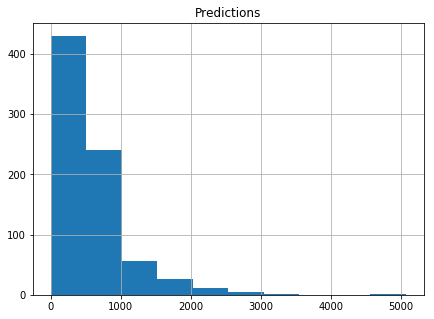

In [24]:
plot = pd.DataFrame({"Predictions": RF_preds})
plot.hist(figsize = (7, 5))

In [25]:
#Stratified k fold cross validation 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing


X = Train.drop( ['ID','Yield','Yield_Binned'], axis=1).values
y = Train['Yield'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# Create  classifier object.
lgbm =LGBMRegressor(max_depth=7,force_row_wise=True, random_state=42)
RMSEscores = []
MAEscores = []
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X,Train['Yield_Binned']):
    X_train, y_train = X[train_index], y[train_index]
    X_test,y_test  = X[test_index], y[test_index]
    lgbm.fit(X_train,y_train)
    lgbm_preds = lgbm.predict(X_test)#[:,1]#lgbm_preds
    RMSEscores.append(mean_squared_error(y_test,lgbm_preds, squared=False))
    MAEscores.append(mean_absolute_error(y_test,lgbm_preds))
       
print("\nRMSEscoresMean:",np.mean(RMSEscores),"\nSTD: ", np.std(RMSEscores))
print("\nMAEscoresMean:",np.mean(MAEscores),"\nSTD: ", np.std(MAEscores))


C:\Users\Lenovo\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:152: UserWarning: Could not find the number of physical cores for the following reason:
__init__() got an unexpected keyword argument 'capture_output'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  "following reason:\n" + str(exception) + "\n"
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 229, in _count_physical_cores
    capture_output=True)
  File "C:\Users\Lenovo\Anaconda3\lib\subprocess.py", line 403, in run
    with Popen(*popenargs, **kwargs) as process:


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 3095, number of used features: 51
[LightGBM] [Info] Start training from score 594.000646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 3095, number of used features: 50
[LightGBM] [Info] Start training from score 589.215186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Info] Total Bins 1507
[LightGBM] [Info] Number of data points in the train set: 3096, number of used features: 50
[LightGBM] [Info] Start training from score 596.357558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257C0F4F710>]],
      dtype=object)

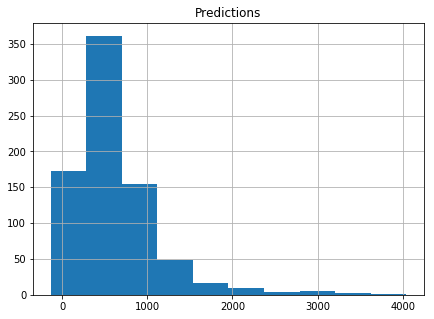

In [26]:
plot = pd.DataFrame({"Predictions": lgbm_preds})
plot.hist(figsize = (7, 5))

### XGBoost

In [27]:

#Stratified k fold cross validation 
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
X = Train.drop( ['ID','Yield','Yield_Binned'], axis=1).values
y = Train['Yield'].values
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)
# Create  classifier object.
# XGBRegressor = XGBRegressor(max_depth=7,
#                            learning_rate= 0.007019588453219404, n_estimators= 1000, 
#                reg_lambda= 0.51741567685111344, 
#               colsample_bytree= 0.33985145102690903, 
#               subsample= 0.98, min_child_weight= 2,
# #               eval_metric='mlogloss',
#               random_state=21, n_jobs=1)
XGBRegressor = XGBRegressor(max_depth=7,
                            n_estimators= 20 ,random_state=21)
RMSEscores = []
MAEscores = []
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X,Train['Yield_Binned']):
    X_train, y_train = X[train_index], y[train_index]
    X_test,y_test  = X[test_index], y[test_index]
    XGBRegressor.fit(X_train,y_train)
    XGB_preds = XGBRegressor.predict(X_test)#[:,1]#lgbm_preds
    RMSEscores.append(mean_squared_error(y_test,XGB_preds, squared=False))
    MAEscores.append(mean_absolute_error(y_test,XGB_preds))
       
print("\nRMSEscoresMean:",np.mean(RMSEscores),"\nSTD: ", np.std(RMSEscores))
print("\nMAEscoresMean:",np.mean(MAEscores),"\nSTD: ", np.std(MAEscores))



RMSEscoresMean: 492.6630805258349 
STD:  155.37215813347544

MAEscoresMean: 116.34289800777658 
STD:  12.71474140153879


In [ ]:
score1 = XGBRegressor.score(X,y)
print(score1 ) 

In [ ]:

plot = pd.DataFrame({"Predictions": XGB_preds})
plot.hist(figsize = (7, 5))

In [ ]:
XGB_plot = pd.DataFrame({"Predictions": XGB_preds})
XGB_plot.plot()

In [ ]:
# # Fitting SVR to the dataset
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

#Stratified k fold cross validation 

X = Train.drop( ['ID','Yield','Yield_Binned'], axis=1).values
y = Train['Yield'].values
# Create  classifier object.
SVRregressor = SVR(kernel = 'linear')
RMSEscores = []
MAEscores = []
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X,Train['Yield_Binned']):
    X_train, y_train = X[train_index], y[train_index]
    X_test,y_test  = X[test_index], y[test_index]
    SVRregressor.fit(X_train, y_train)
    SVR_preds = SVRregressor.predict(X_test)#[:,1]#lgbm_preds
    RMSEscores.append(mean_squared_error(y_test,SVR_preds, squared=False))
    MAEscores.append(mean_absolute_error(y_test,SVR_preds))
       
print("\nRMSEscoresMean:",np.mean(RMSEscores),"\nSTD: ", np.std(RMSEscores))
print("\nMAEscoresMean:",np.mean(MAEscores),"\nSTD: ", np.std(MAEscores))


In [ ]:
plot = pd.DataFrame({"Predictions": SVR_preds})
plot.hist(figsize = (7, 5))

In [ ]:
# # Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

#Stratified k fold cross validation 

X = Train.drop( ['ID','Yield','Yield_Binned'], axis=1).values
y = Train['Yield'].values
# Create  classifier object.
LRegressor = LinearRegression()
RMSEscores = []
MAEscores = []
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X,Train['Yield_Binned']):
    X_train, y_train = X[train_index], y[train_index]
    X_test,y_test  = X[test_index], y[test_index]
    LRegressor.fit(X_train,y_train)
    
    LR_preds = LRegressor.predict(X_test)#[:,1]#lgbm_preds
    RMSEscores.append(mean_squared_error(y_test,LR_preds, squared=False))
    MAEscores.append(mean_absolute_error(y_test,LR_preds))
       
print("\nRMSEscoresMean:",np.mean(RMSEscores),"\nSTD: ", np.std(RMSEscores))
print("\nMAEscoresMean:",np.mean(MAEscores),"\nSTD: ", np.std(MAEscores))


In [ ]:
plot = pd.DataFrame({"Predictions": LR_preds})
plot.hist(figsize = (7, 5))

### Voting Regressor Model

In [36]:
# lgbm_params = {'learning_rate': 0.0038086413128466594, 'n_estimators': 1140, 'max_depth': 6, 
#           'reg_lambda': 0.4818289184780679, 'colsample_bytree': 0.7285467426435586, 
#           'subsample': 0.5780480880588804, 'min_child_samples': 38, 
#           'random_state':21, 'n_jobs': -1}

rnf_params = {'max_depth': 16, 'n_estimators': 100,'random_state':21}

# xgb_params = {'max_depth':7,
#                            'learning_rate': 0.007019588453219404, 'n_estimators':1000, 
#               'reg_lambda': 0.51741567685111344, 
#               'colsample_bytree': 0.3985145102690903, 
#              'subsample': 0.9800087971080677,'min_child_weight':2,
# #               eval_metric='mlogloss',
#               'random_state':21,'n_jobs':1}
xgb_params = {'max_depth':7,'random_state':21}

# cat_params = {'learning_rate': 0.00829676857849778, 'iterations': 2450, "verbose":0, 'random_state':21, 'task_type': 'GPU'}

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


#Stratified k fold cross validation 

X = Train.drop( ['ID','Yield','Yield_Binned'], axis=1).values
y = Train['Yield'].values
# Create  classifier object.
models = [
#             ('lgb', LGBMClassifier(**lgbm_params)),
            ('rnd', RandomForestRegressor(**rnf_params)),
            ('xgb', XGBRegressor(**xgb_params)),
#             ('cat', CatBoostClassifier(**cat_params)),
             ]

VotingModel =  VotingRegressor(estimators=models)
RMSEscores = []
MAEscores = []
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X,Train['Yield_Binned']):
    X_train, y_train = X[train_index], y[train_index]
    X_test,y_test  = X[test_index], y[test_index]
    VotingModel.fit(X_train,y_train)
    Voting_preds = VotingModel.predict(X_test)#[:,1]#lgbm_preds
    RMSEscores.append(mean_squared_error(y_test,Voting_preds, squared=False))
    MAEscores.append(mean_absolute_error(y_test,Voting_preds))
       
print("\nRMSEscoresMean:",np.mean(RMSEscores),"\nSTD: ", np.std(RMSEscores))
print("\nMAEscoresMean:",np.mean(MAEscores),"\nSTD: ", np.std(MAEscores))





RMSEscoresMean: 464.2735955010495 
STD:  173.61937277355278

MAEscoresMean: 112.46105755007447 
STD:  12.76277673578921


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257C3437208>]],
      dtype=object)

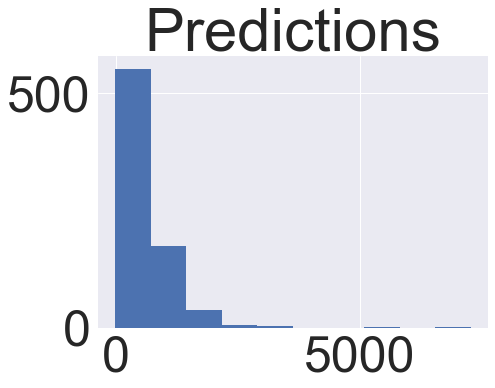

In [38]:
plot = pd.DataFrame({"Predictions": Voting_preds})
plot.hist(figsize = (7, 5))

In [ ]:
score1 = VotingModel.score(X,y)
print(score1 ) 

In [ ]:
# # X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
# ##
# from lightgbm import LGBMRegressor
# lgbm =LGBMRegressor(max_depth=7,force_row_wise=True, random_state=42)
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error
# tscv = TimeSeriesSplit(n_splits=4)   #We chose 2 splits because the test set is half the number of training set
# scores = []
# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_Train, X_Test = X[train_index], X[test_index]
#     y_Train, y_Test = y[train_index], y[test_index]
#     lgbm.fit(X_Train,y_Train)
#     y_pred = lgbm.predict(X_Test)
#     scores.append(mean_absolute_error(y_pred,y_Test))
# print("\nMean:",np.mean(scores),"\nSTD: ", np.std(scores))


In [ ]:
#y_Train.astype(float64)

In [ ]:
# # Adding the input layer and the first hidden layer
# classifier.add(Dense(units=6,input_shape=[X_train.shape[1]], activation = 'relu',kernel_initializer='random_uniform',use_bias=True,bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, input_dim = 11))

# # Adding the second hidden layer
# classifier.add(Dense(units=6,  activation = 'relu',kernel_initializer='random_uniform',use_bias=True,bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))

# # Adding the output layer
# classifier.add(Dense(units= 1, activation = 'sigmoid'))

# # Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae '])


In [ ]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_Train = sc.fit_transform(X)
# X_Test_sc= sc.transform(X_Test)

In [ ]:
# from lightgbm import LGBMRegressor
# lgbm =LGBMRegressor(max_depth=7,force_row_wise=True, random_state=42)
# lgbm.fit(X_Train,y_Train)
# y_pred = lgbm.predict(X_Test)

In [ ]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_Test ,y_pred)

In [ ]:
# #Train The model on the  crossval set
# from sklearn.ensemble import RandomForestRegressor
# RFRegrosor = RandomForestRegressor(n_estimators =10 ,criterion='mae',random_state=42)
# RFRegrosor.fit(X_Train,y_Train)
# # Predicting the crossval set results
# preds = RFRegrosor.predict(X_Test)

In [ ]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_Test ,preds)

In [ ]:
# score1 = RFRegrosor.score(X_Train,y_Train)
# score2 = RFRegrosor.score(X_Test, y_Test)#score1 = clf2.score(X_Train,y_Train)

# print("Train_Accuracy for RFRegrosor: {}".format(score1))#print(score1)
# print("Test_Accuracy for RFRegrosor: {}".format(score2))#print(score2)

In [28]:
#Plot the Model Features Importances
def plotImp(model, X , num = 20, fig_size = (60, 40)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title(str(model)+' Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

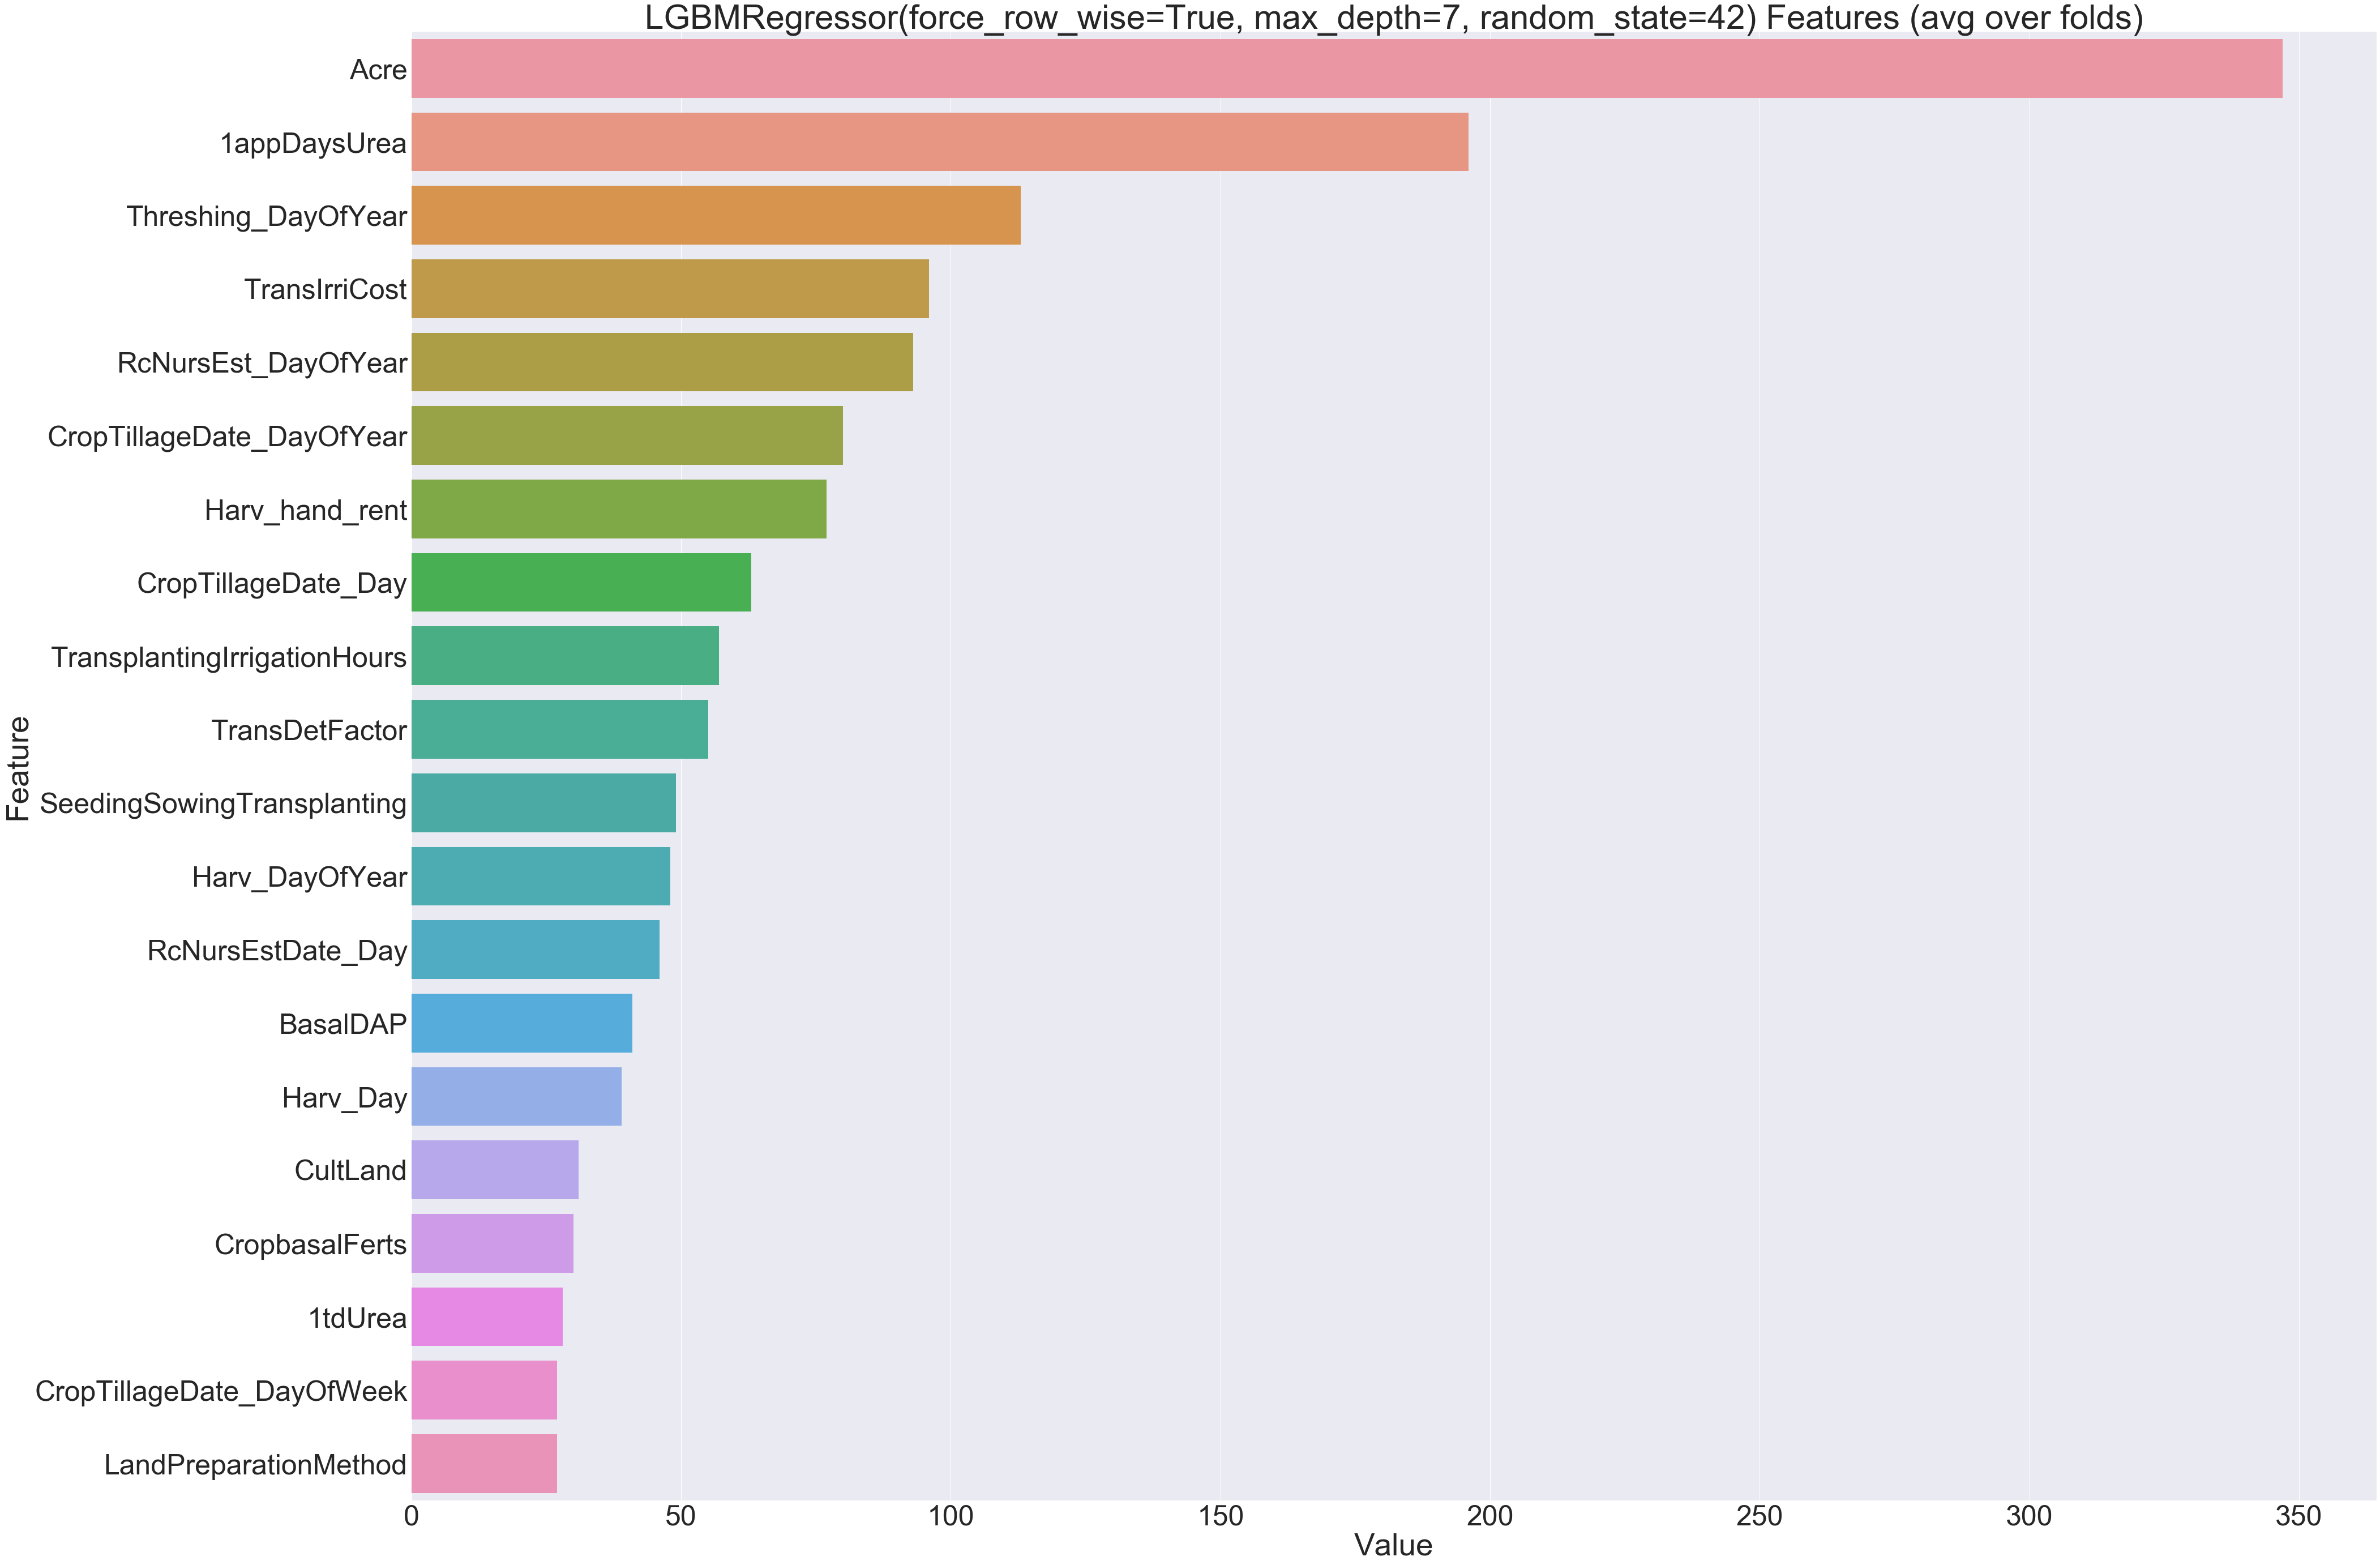

In [29]:
plotImp(lgbm,Train.drop(['ID', 'Yield','Yield_Binned'], axis=1))#Train['Yield_Binned']

In [ ]:
# plotImp(lgbm,Train_df.drop('Yield', axis=1))

In [ ]:
def featImportance(model, X , num = 20, fig_size = (60, 40)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    data=feature_imp.sort_values(by="Value",ascending=False)[0:num]
    print(data.Feature.unique())
featImportance(lgbm,Train_df.drop(['ID', 'Yield'], axis=1))

In [ ]:
featImportance(lgbm,Train.drop(['ID', 'Yield','Yield_Binned'], axis=1))

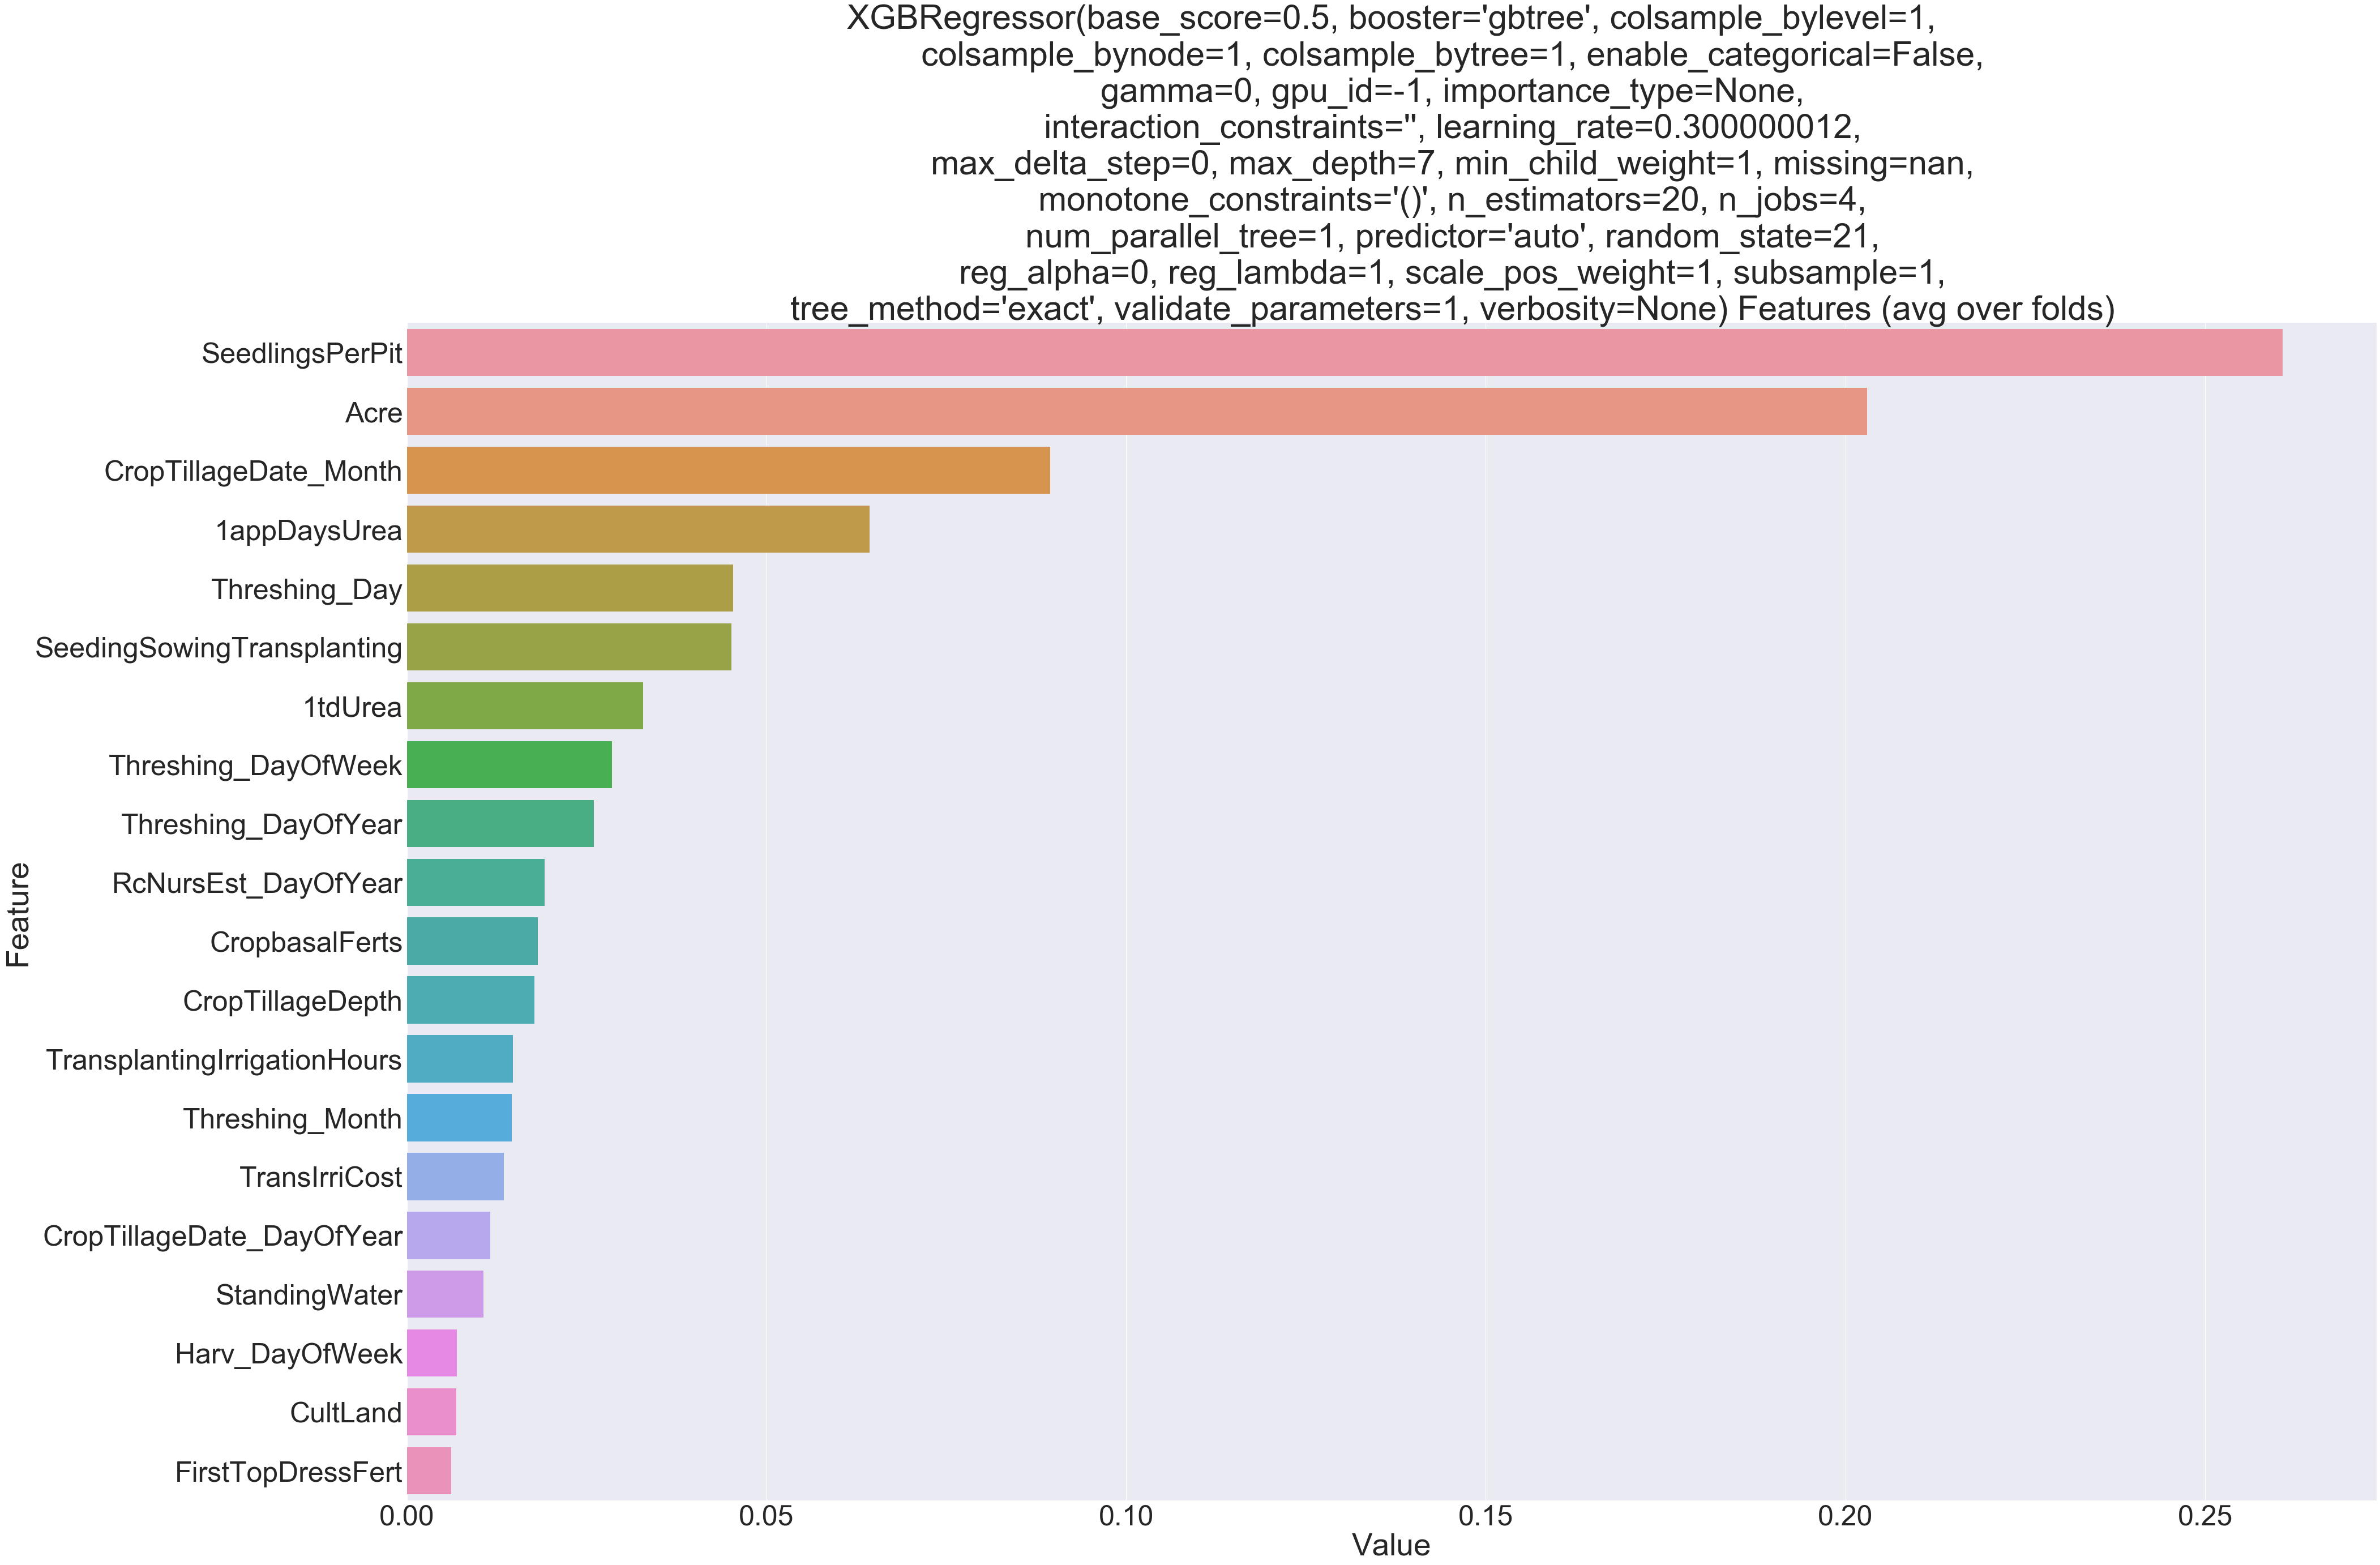

In [30]:
plotImp(XGBRegressor,Train.drop(['ID', 'Yield','Yield_Binned'], axis=1))

In [ ]:
#lgbm.fit(train_df.drop('Offset_fault',axis=1),train_df['Offset_fault'])
# plotImp(XGBRegressor,Train_df.drop( 'Yield', axis=1))

In [ ]:
plotImp(RFRegressor,Train.drop(['ID', 'Yield','Yield_Binned'], axis=1))

In [ ]:
plotImp(VotingModel,Train.drop(['ID', 'Yield','Yield_Binned'], axis=1))

In [ ]:
# plotImp(RFRegressor,Train_df.drop( 'Yield', axis=1))

In [ ]:
def featImportance(model, X , num = 20, fig_size = (60, 40)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    data=feature_imp.sort_values(by="Value",ascending=False)[0:num]
    print(data.Feature.unique())
featImportance(RFRegressor,Train_df.drop( 'Yield', axis=1))

In [ ]:
#!pip3 install --upgrade pandas

### Fitting all data

In [ ]:
ID=Test['ID']

In [31]:
# X = df_2.drop('Energy', axis=1)
# y = df_2['Energy'].copy()
RFRegressor.fit(X,y)
# RF_preds = RFRegressor.predict(Test_df.drop('ID', axis=1))
RF_preds = RFRegressor.predict(Test.drop('ID', axis=1))
# RF_preds = RFRegressor.predict(Test_df)

In [ ]:
score1 = RFRegressor.score(X,y)
print(score1 ) 

In [ ]:
plot = pd.DataFrame({"Predictions": RF_preds})
plot.hist(figsize = (7, 5))

In [32]:
# from lightgbm import LGBMRegressor
# lgbm =LGBMRegressor(max_depth=7,force_row_wise=True, random_state=42)
lgbm.fit(X,y)
lgbm_pred = lgbm.predict(Test.drop('ID', axis=1))
# lgbm_pred = lgbm.predict(Test_df)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 1553
[LightGBM] [Info] Number of data points in the train set: 3869, number of used features: 51
[LightGBM] [Info] Start training from score 594.386663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
score = lgbm.score(X,y)
print(score)

In [ ]:
plot = pd.DataFrame({"Predictions": lgbm_pred})
plot.hist(figsize = (7, 5))

In [ ]:
#SVR
SVRregressor.fit(X, y)
SVR_pred = SVRregressor.predict(Test.drop('ID', axis=1))
# SVR_pred = SVRregressor.predict(Test_df)

In [ ]:
score = SVRregressor.score(X,y)
print(score)

In [ ]:
LRegressor.fit(X, y)
LR_pred = LRegressor.predict(Test.drop('ID', axis=1))
# LR_preds = LRegressor.predict(Test_df)

In [ ]:
score = Lregressor.score(X,y)
print(score)

In [ ]:
plot = pd.DataFrame({"Predictions": LR_pred})
plot.hist(figsize = (7, 5))

In [33]:
XGBRegressor.fit(X,y)
# XGB_pred = XGBRegressor.predict(Test.drop('ID', axis=1)
XGB_pred =XGBRegressor.predict(Test.drop('ID', axis=1))
#XGB_pred = XGBRegressor.predict(Test_df)


In [ ]:
score = XGBRegressor.score(X,y)
print(score)

In [39]:
VotingModel.fit(X,y)
Voting_preds = VotingModel.predict(Test.drop('ID', axis=1))#[:,1]#lgbm_preds

In [ ]:

score1 = VotingModel.score(X,y)
print(score1 ) 

In [35]:
#Make the Submission file XGB_pred
XGB_submission = pd.DataFrame({"ID": ID ,"Yield": XGB_pred})
XGB_submission.to_csv('XGB_treating outlier var.csv',index=False)

##### # Make the Submission file 
lgbm_submission = pd.DataFrame({"ID": ID ,"Target": lgbm_pred})
lgbm_submission.to_csv('lgbm_treating outlier var.csv',index=False)

In [40]:
#Make the Submission file
Voting_submission = pd.DataFrame({"ID": ID ,"Target": Voting_preds})
Voting_submission.to_csv('treating outlier vars.csv',index=False)

In [34]:
#Make the Submission file
RF_submission = pd.DataFrame({"ID": ID ,"Target": RF_preds})
RF_submission.to_csv('RF_treating outlier var.csv',index=False)

In [ ]:
#Make the Submission file
LR_submission = pd.DataFrame({"ID": ID ,"Target": LR_pred})
LR_submission.to_csv('LR_topdate.csv',index=False)

In [ ]:
#Make the Submission file
SVR_submission = pd.DataFrame({"ID": ID ,"Target": SVR_pred})
SVR_submission.to_csv('SVR_topdate.csv',index=False)

In [ ]:
score1 = RFRegressor.score(X,y)
print(score1 ) 

In [ ]:
score1 = LR_pred.score(X,y)
print(score1 )

In [ ]:
submission['Target'] .unique()

In [ ]:
submission

In [ ]:
submission.to_csv('Baseline2.csv',index=False)

In [ ]:
!pip install lofo-importance